# <center> 💾📈  2.3 - Визуализация и соревновательный анализ данных </center>

# <center> <img src = '../images/visual.JPG' width=1000>

<div class="alert alert-info">
    
А зачем нужна визуализация в соревновательном анализе данных? 🤔

- Качественная визуализация хорошо сочетается с генерацией и анализом признаков.
Легко понять какие признаки будут полезны. 
- Визуализация может здорово помочь разобраться в том, как устроены данные или как работает ваша модель. Проверить наличие зависимости визуально.
- В курсе мы будем часто использовать элементы графики для поиска инсайдов в данных.

# Импорт библиотек

In [52]:
!pip install --upgrade numpy pandas seaborn -q

import numpy as np
import pandas as pd

import warnings
warnings.simplefilter("ignore")

# Импорт данных
__Обогатим данные по поездкам__

In [53]:
# Загружаем уже знакомый нам датасет

rides_info = pd.read_csv("../data/rides_info.csv")
cars = pd.read_csv("../data/car_train.csv")
driver_info = pd.read_csv("../data/driver_info.csv")

rides_info = rides_info.merge(cars, on="car_id", how="right")
rides_info = rides_info.merge(driver_info, on="user_id", how="left")

# <center> Встроенные элементы визуализации в Pandas</center> 

<div class="alert alert-info">
Для визуализации данных из датасета необязательно использовать сторонние фреймворки,<br>
в Pandas есть несколько встроенных функций, которыми достаточно просто пользоваться.

In [5]:
rides_info.head(3)

user_id      car_id ride_id   ride_date  rating  ride_duration  \
0  n14703870u  y13744087j     Q1Z  2020-01-01    5.72            220   
1  W18144322F  y13744087j     M1P  2020-01-01    2.52          37392   
2  Q11878237R  y13744087j     D1j  2020-01-02    7.17             45   

   ride_cost  speed_avg  speed_max  stop_times  ...  riders  year_to_work  \
0       3514         42        NaN           6  ...   76163          2021   
1     523483         45       53.0           2  ...   76163          2021   
2        444         54       82.0           0  ...   76163          2021   

   target_reg  target_class age user_rating user_rides  user_time_accident  \
0     9492.96   another_bug  38         7.4        268                 2.0   
1     9492.96   another_bug  46         6.7        643                 3.0   
2     9492.96   another_bug  49         8.4        161                 NaN   

   sex  first_ride_date  
0    0         2019-9-7  
1    0        2020-7-28  
2    0        2020-3-23  

[3 rows x 29 columns]

# <center><b>Смотрим на распределение через `df.hist( )`</b></center> 

<code>df.hist( )</code> - строит гистограмму распределения данных по числовым столбцам

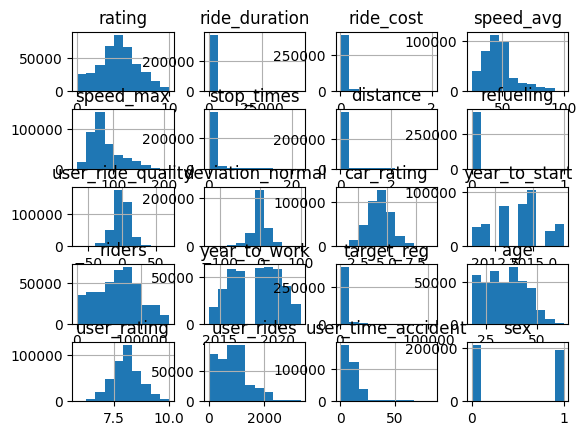

In [7]:
rides_info.hist();  # Вызываем функцию hist( )

Видно, что графики получились мелкие и текстовая информация накладывается друг на друга, также столбец пол определился как числовой, хотя является категориальным. Исправим это, добавив параметр <code>figsize</code> и отсеим ненужный столбец. Так же, чтобы не выводились служебные строки перед графиками можно добавить `None` или `;` в конце ячейки.

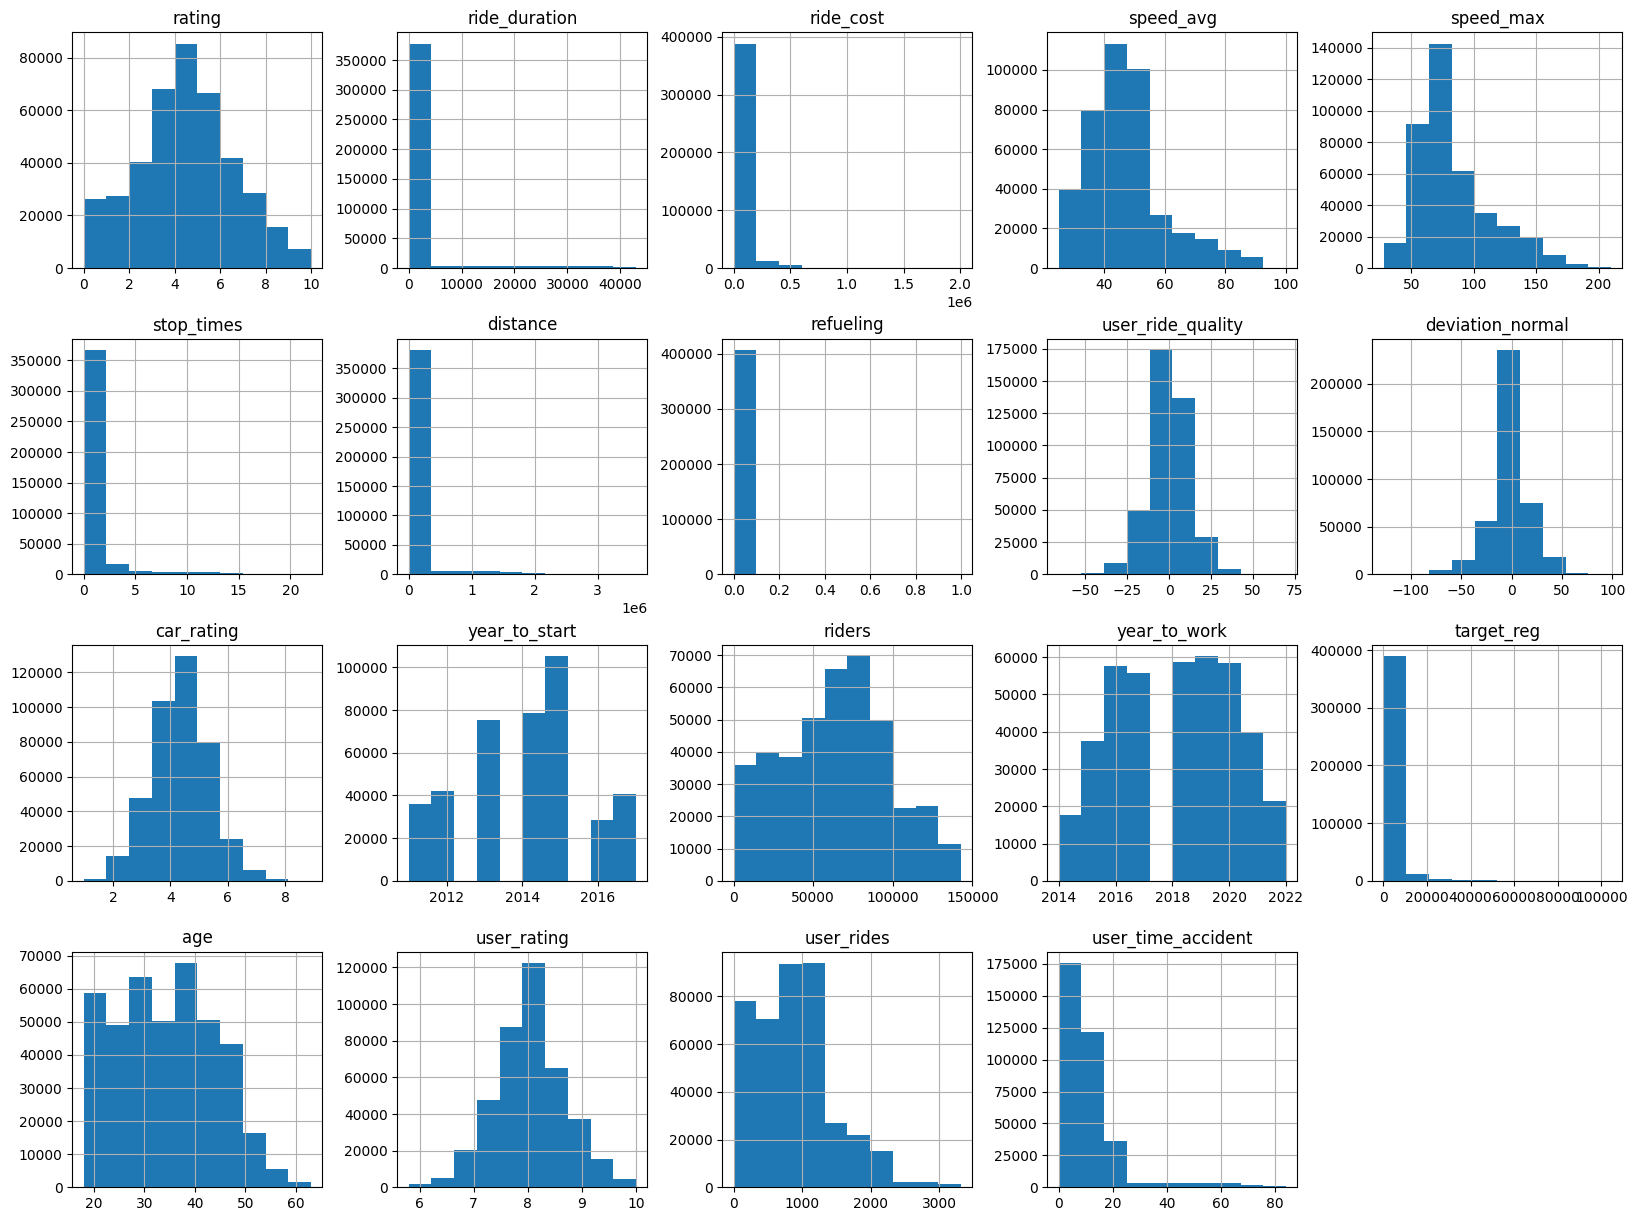

In [8]:
# Добавили ; в конце, чтобы не выводилась служебная информация
rides_info.drop("sex", axis=1).hist(figsize=(20, 15), layout=(-1, 5));

# <center><b>Распределение через боксплот `df.boxplot( )`</b></center> 

<div class="alert alert-info">
    
<code>df.boxplot( )</code> - функция, позволяющая рисовать, так называемые, "ящики с усами", показывающие среднее значение, стандартные отклонения и разброс признака на одном графике. Давайте отобразим вид поломки, в зависимоти от рейтинга водителя, также поменяем параметр <code>fontsize</code>, отвечающий за размер шрифта.

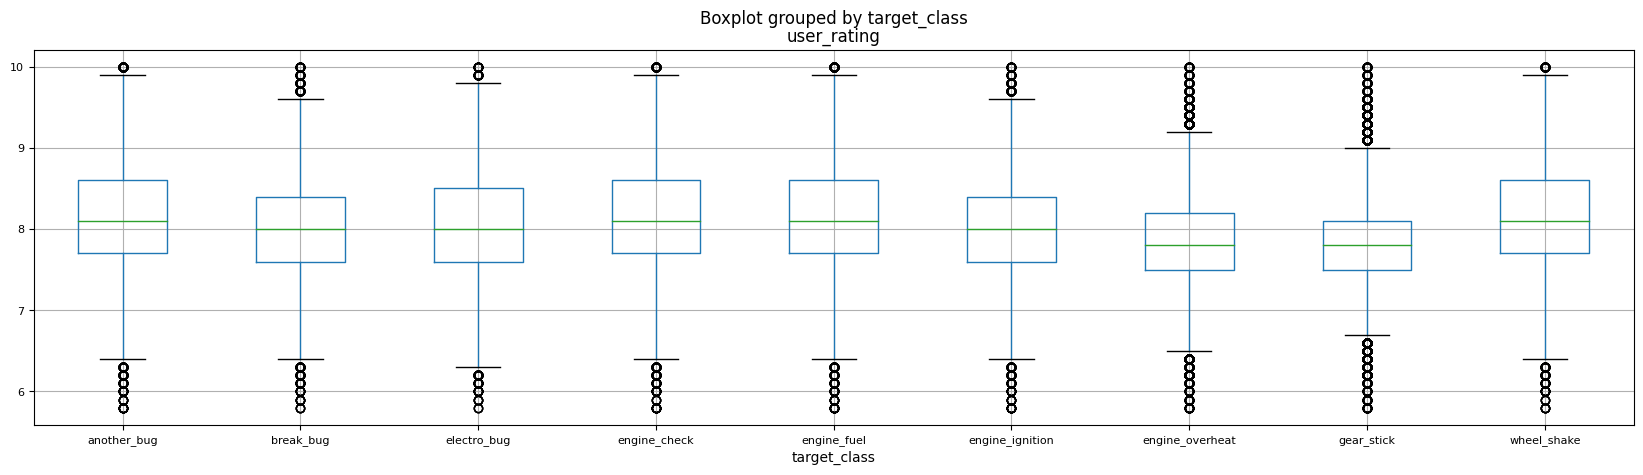

In [9]:
rides_info.boxplot(
    column=["user_rating"], by="target_class", fontsize=8, figsize=(20, 5)
);

# <center> Тепловые карты зависимостей численных и категориальных переменных </center>

In [12]:
corr = rides_info.corr().round(2)
corr.style.background_gradient(cmap="RdYlGn")

In [17]:
pd.crosstab(
    rides_info["target_class"],
    rides_info["model"],
    # margins = True,
    normalize = True
).style.background_gradient(cmap="RdYlGn")

### И все это не выходя из Pandas !

<div class="alert alert-info">
    
`df.plot( )` - функция предоставляющая весь функционал библиотеки Matplotlib, так же можно через точку указывать конкретный тип желаемого графика, например: `df.plot.bar( )` или `df.plot.scatter( )`. На наш взгляд, пользоваться ей не очень удобно, поэтому не будем на ней останавливаться, подробнее можно ознакомиться в документации. Сразу перейдем к более продвинутым инструментам!

<!-- ничего -->
<!-- ничего -->
<!-- ничего -->
<!-- ничего -->
<!-- ничего -->
<!-- ничего -->
<!-- ничего -->
<!-- ничего -->
<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

# <center> seaborn - это все что вам надо!</center> 

<center><img src = 'https://livecodestream.dev/post/how-to-build-beautiful-plots-with-python-and-seaborn/featured.jpg' width=800 height = 400></center> 

In [19]:
import seaborn as sns

sns.set_theme()  # Тут можно задать стили

# <center>`sns.scatterplot()` + `sns.lineplot()` + 💪 =  `sns.relplot`(`kind = ...`) </center> 

<div class="alert alert-info">
    
Функция `relplot()` объединяет в себе функционал `scatterplot()` (диаграмма рассеяния) и `lineplot()`, смена происходит переключателем `kind`. <br>
Таким образом можно держать в голове меньше разных названий функций и параметров. 

Более того, `plt.figure(figsize=(20, 5)) ` больше не нужен, ведь есть параметры `height` и `aspect`. 

Диаграмма рассеяния — это диаграмма, которая отображает точки на основе двух измерений набора данных.

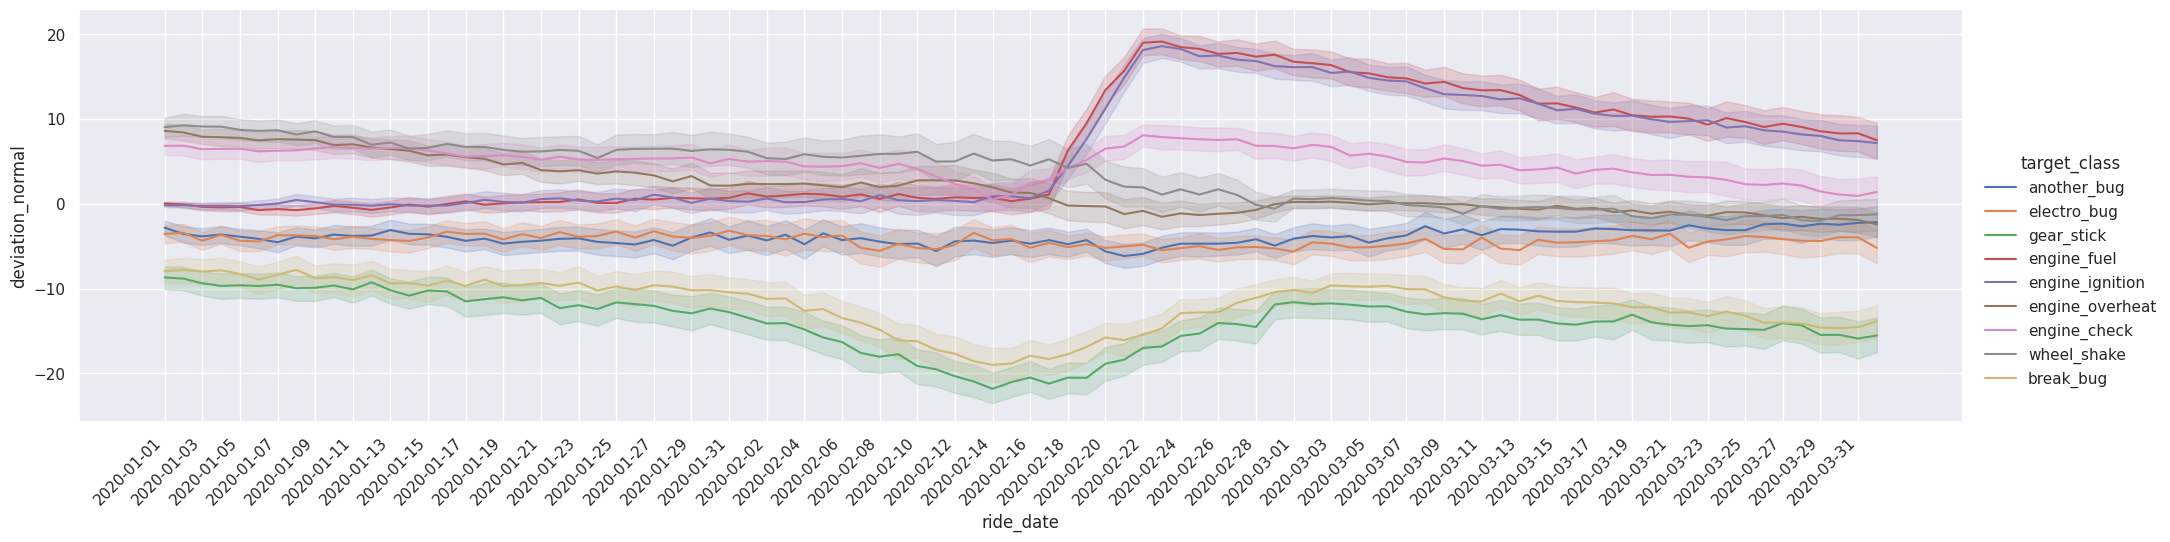

In [23]:
g = sns.relplot(
    data=rides_info,
    x="ride_date",
    y="deviation_normal",
    hue="target_class",
    kind="line",  # или scatter
    aspect=4,
)

g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

<div class="alert alert-info">

По оси `х` мы вытянули время. По оси `y` исследуемый столбец, в данном случае `deviation_normal`. Все точки окрасили в соответствующий класс для наглядности. 
    
Становится видно, что величина `deviation_normal` ведет себя по-разному в зависимости от класса будущей поломки. Например, точку перегиба в центре графика для класса `engine_ignition` можно использовать как вспомогательный признак.

In [24]:
# # Импортируем вспомогтаельные фрагменты из matplolib
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker

# plt.figure(figsize=(20, 5))

# g = sns.lineplot(
#     data=rides_info,
#     x="ride_date",
#     y="deviation_normal",
#     hue="target_class",
# )

# g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")
# g.xaxis.set_major_locator(ticker.MultipleLocator(2));

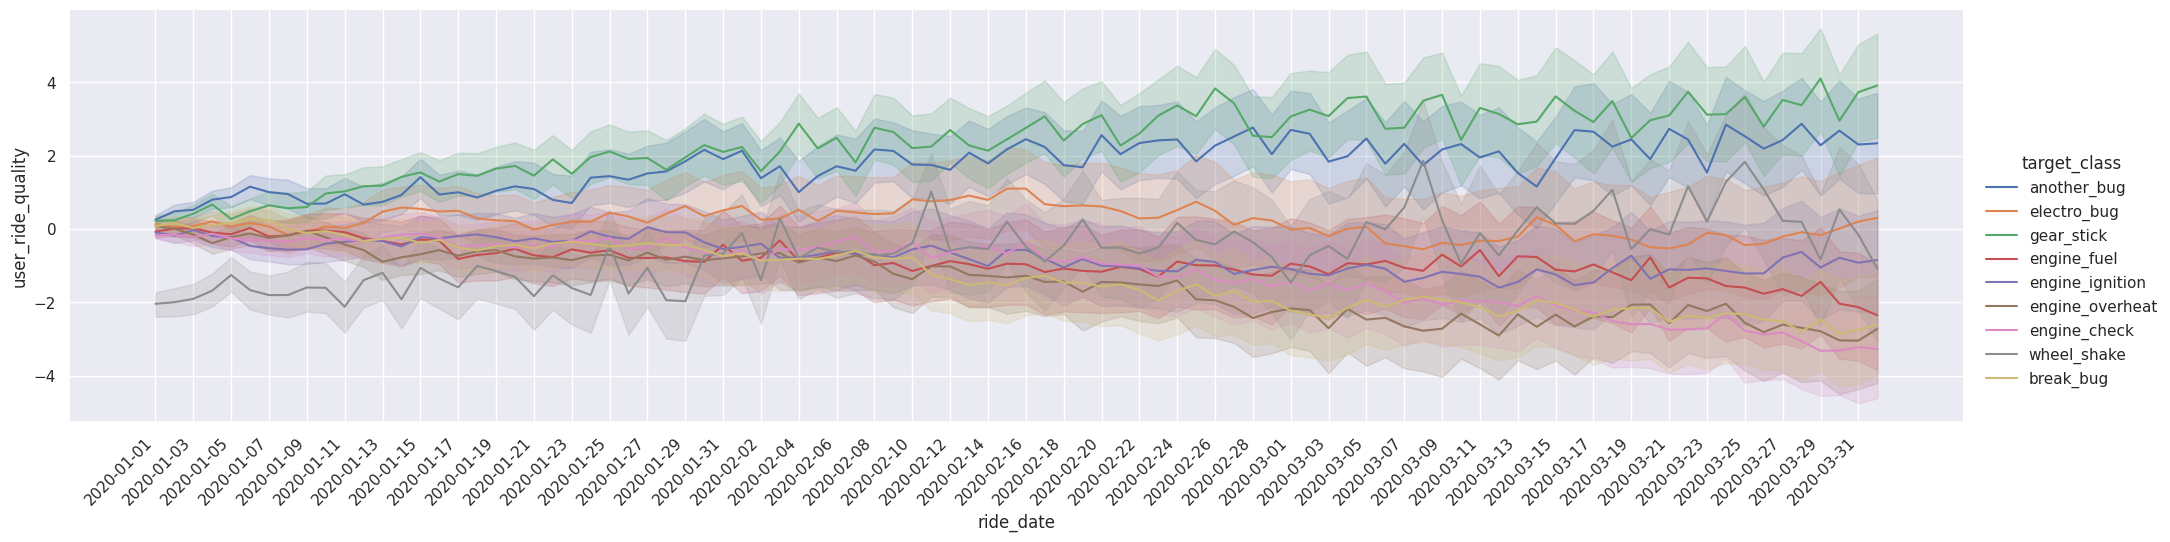

In [25]:
g = sns.relplot(
    data=rides_info,
    x="ride_date",
    y="user_ride_quality",
    kind="line",
    hue="target_class",
    aspect=4,
)

g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

<div class="alert alert-info">

Аналогично растянули признак `user_ride_quality` во времени по оси `y` как исследуемый столбец. Все точки мы окрасили в соответствующий класс для наглядности. 
    
Заметно, что величина `user_ride_quality` ведет себя по-разному в зависимости от класса будущей поломки. Например, стартовая точка у разных классов находится на разной высоте. 

In [28]:
# Отберем информацию только про 10 машин
tmp = rides_info[rides_info["car_id"].isin(rides_info.car_id.unique()[:10])]

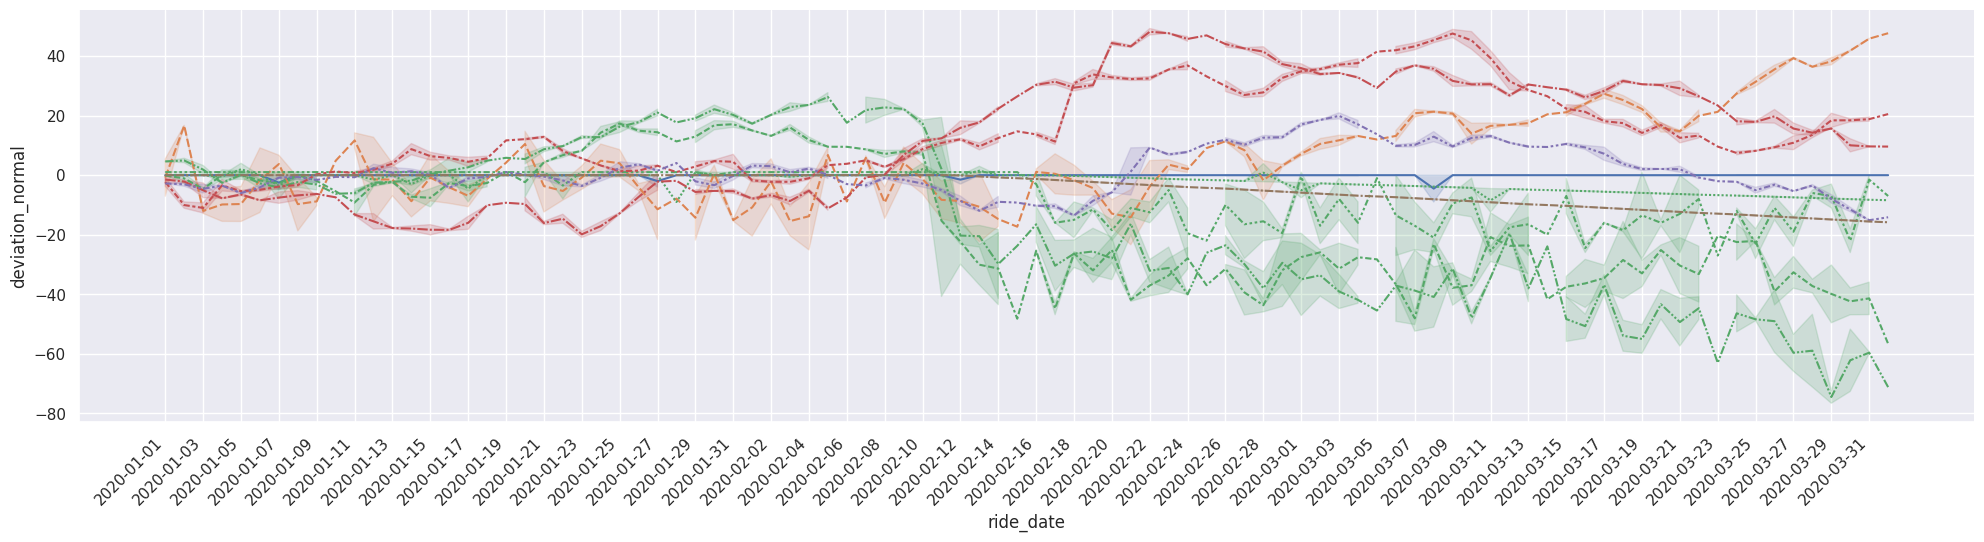

In [29]:
# Как ведет себя deviation_normal во времени для 10 автомобилей

g = sns.relplot(
    data=tmp,
    
    x="ride_date",
    y="deviation_normal",
    
    hue="target_class",
    style="car_id",
    
    legend=False,
    kind="line",
    aspect=4,
)
g.set_xticklabels(rotation=45, horizontalalignment="right", step=2)

<div class="alert alert-info">
    
### Какие признаки могут помочь различить классы поломок?
* Замечаем точки перегиба
* Замечаем точки входа
* Возможно углы наклона до перегиба
    
### Все это можно можно будет использовать, как доп. признаки!


In [ ]:
# Вместо известного нам:

# plt.figure(figsize=(20, 5))
# sns.scatterplot(data = rides_info,
#                  x = 'ride_duration',
#                  y = 'ride_cost',
#                  hue = 'model'
#                 );

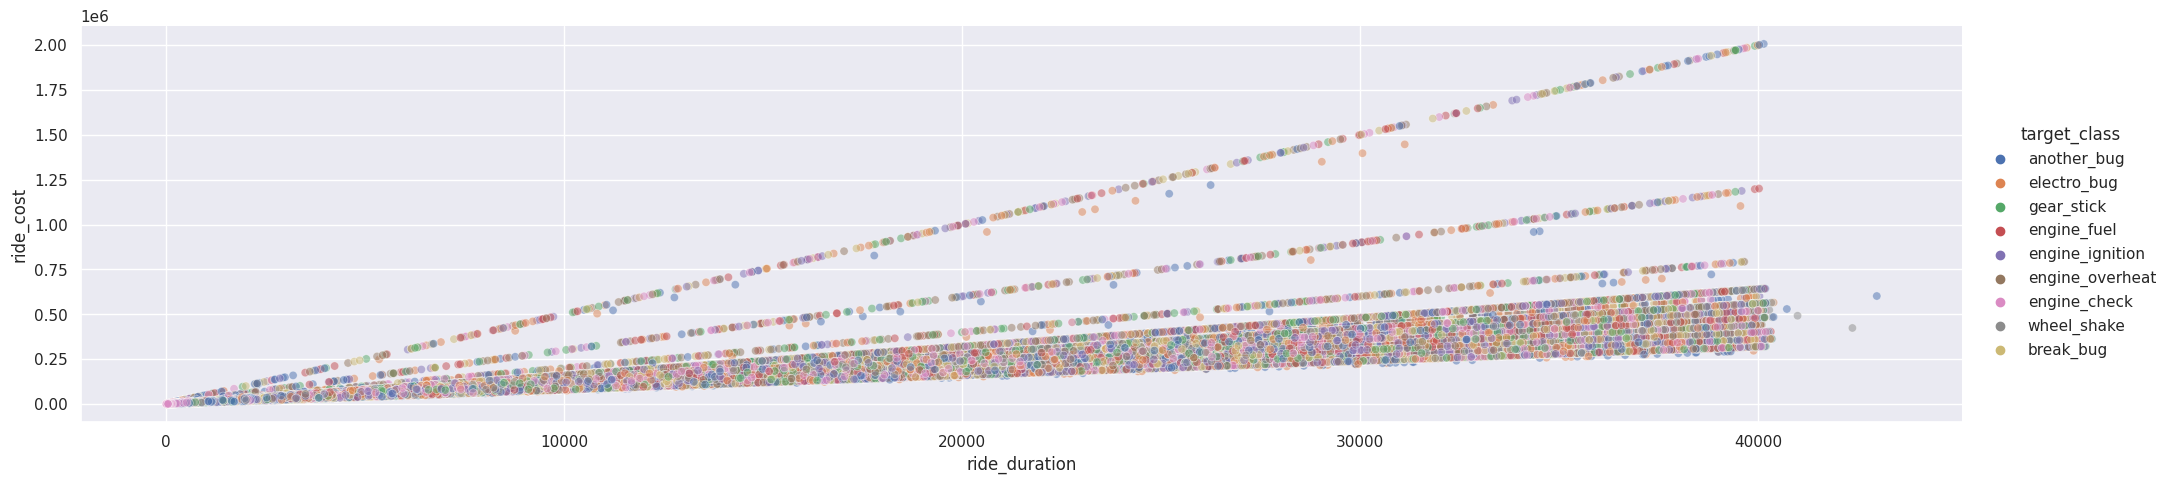

In [30]:
g = sns.relplot(
    data=rides_info,
    x="ride_duration",
    y="ride_cost",
    hue="target_class",
    
    kind="scatter",
    aspect=4,
    alpha=0.5,
);

<div class="alert alert-info">
    
С помощью более функционального `sns.relplot()` пишем меньше кода и быстрее анализируем. Кстати, по графику заметно, что угол наклона у разных машин разный.
    
Возможно `feature = ride_cost/ride_duration` - это отличный доп.признак!   
    
Имеет смысл поиграть с такими параметриами как `row` и `col`, чтобы построить этот график в разрезах по другим категориальным признакам

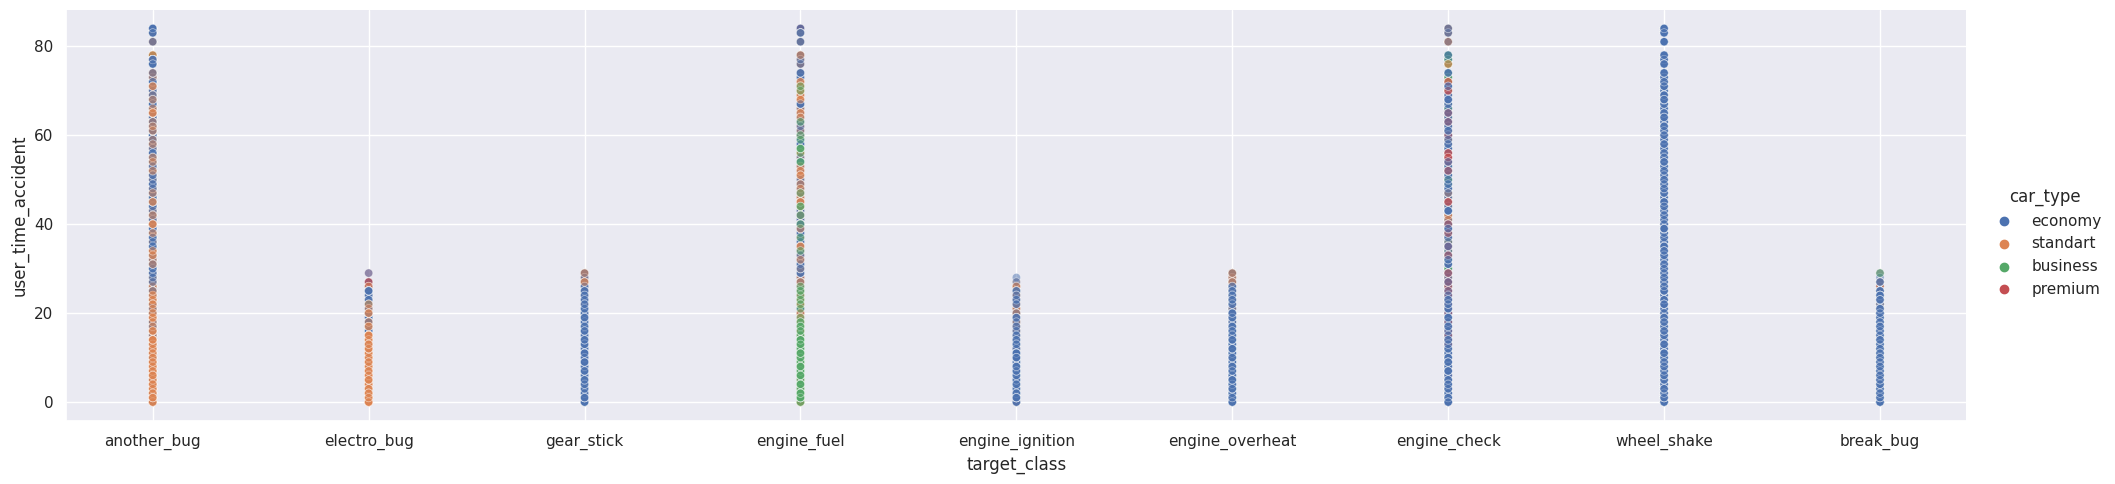

In [31]:
g = sns.relplot(
    data=rides_info,
    x="target_class",
    
    y="user_time_accident",
    
    hue="car_type",
    kind="scatter",
    aspect=4,
    alpha=0.5,
);

<div class="alert alert-info">
    
Запоминайте, полезно растягивать исследуемые признаки не только вдоль времени или численных признаков, но еще и по категориальным переменным.
    
В этом примере по оси `X` таргет, а цветом окрашен сегмент машины.

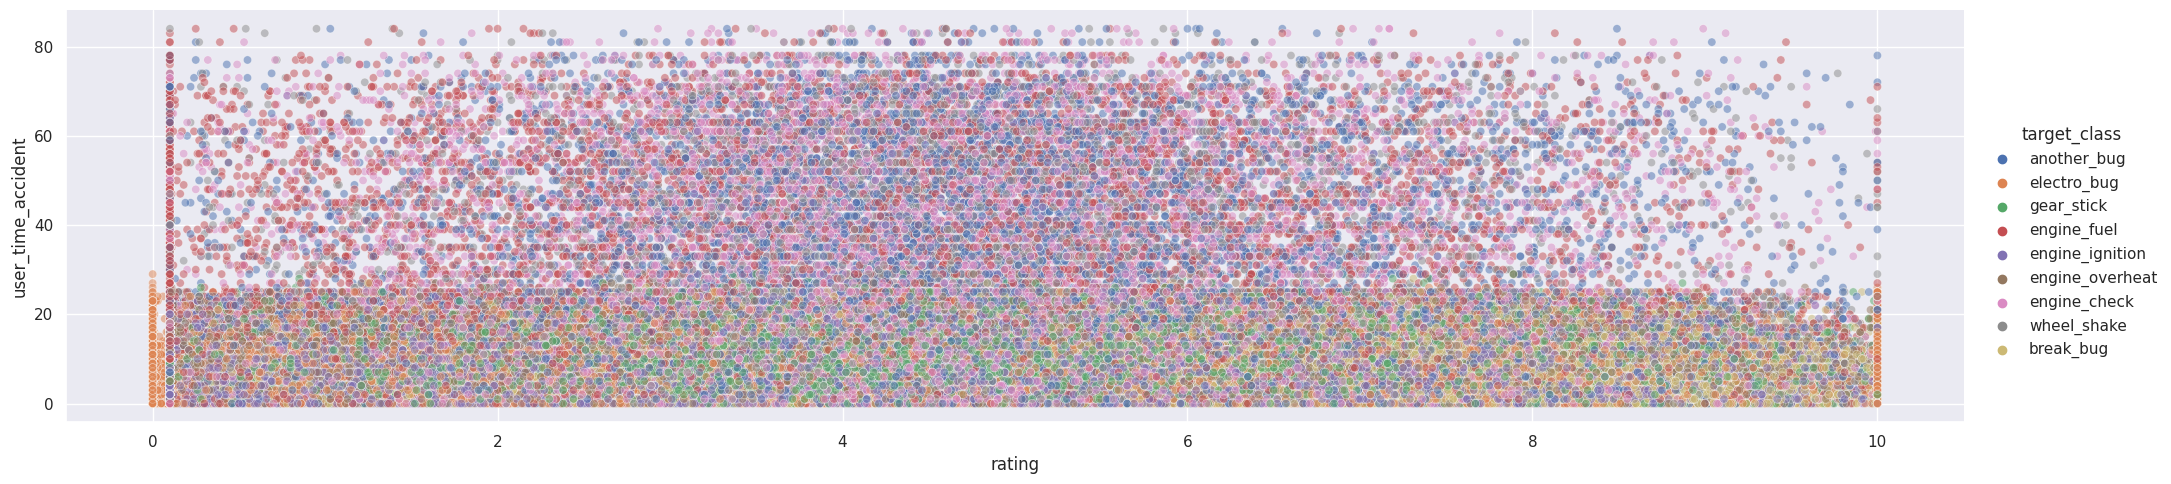

In [32]:
sns.relplot(
    data=rides_info,
    x="rating",
    y="user_time_accident",
    hue="target_class",
    kind="scatter",
    aspect=4,
    alpha=0.5,
);

<div class="alert alert-info">

Еще один интересный инсайт того, как число инцидентов водителя зависит от его рейтинга.

Легко заметить, что некоторые классы поломок свойственны поездкам с низким рейтингом.
    
🧠 Очень рекомендуем применять метод `sns.relplot()`.

# Чтобы эффективнее исследовать данные:

* 🔴 Растягивайте исследуемый признак во времени 
* 🟢 Стройте признак относительно другого признака / частоты
* 🟡 Раскрашивайте точки в категории / таргет (параметры: `hue` / `style` / `size`)

<!-- ничего -->

# <!-- ничего -->

<!-- ничего -->

<!-- ничего -->

# <center>🔥 Построение распределений и <b> sns.displot() 🔥</b></center>

## <center> <b> `sns.displot`(`kind=...`) = `sns.histplot()`  + `kdeplot()` + `ecdfplot()` + 💪 </center>

<div class="alert alert-info">
    
В Seaborn функция `displot()` объединяет в себе функционал `histplot()`, `kdeplot()` и `ecdfplot()` переключение происходит с помощью `kind`. <br>
Получается, что снова можно держать в голове меньше разных названий функций и параметров. И снова `plt.figure(figsize=(20, 5)) ` не нужен, ведь есть параметры `height` и `aspect`. 

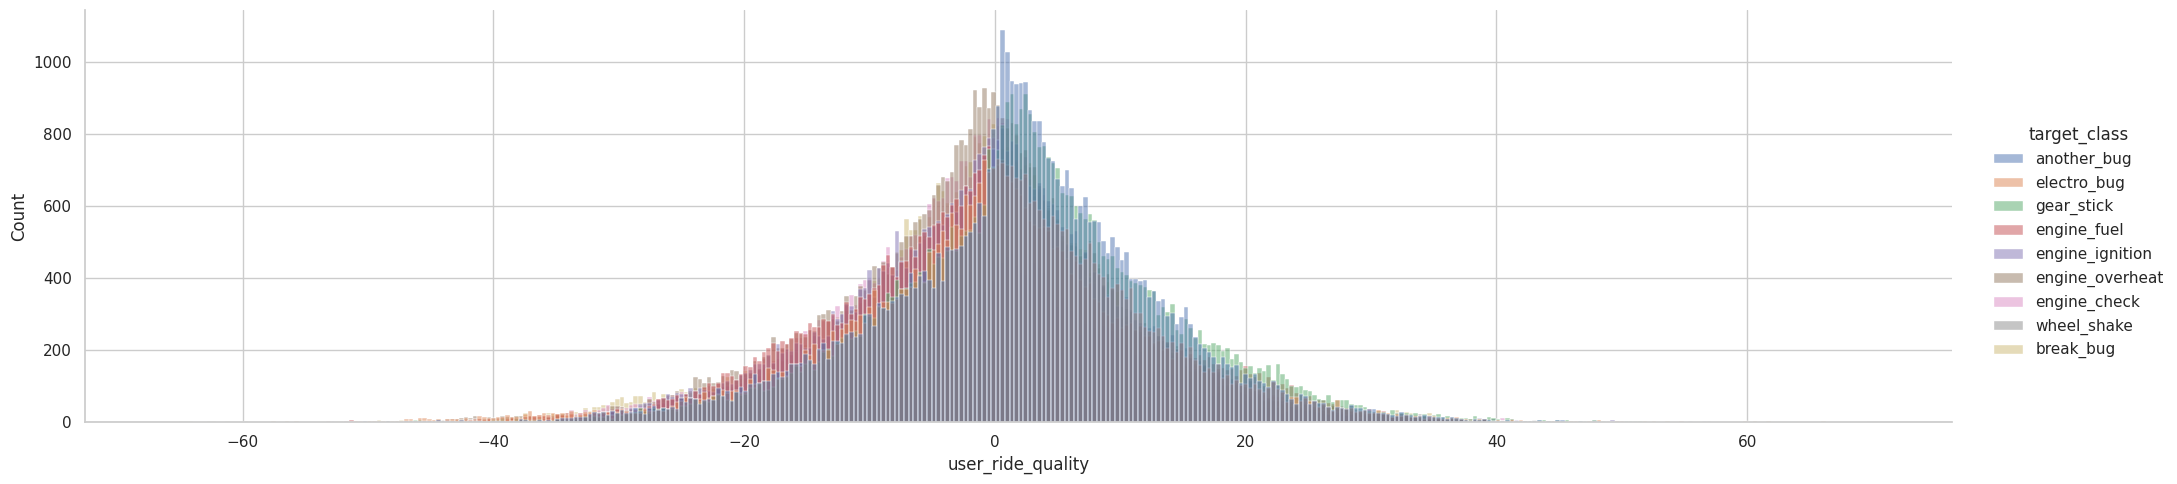

In [59]:
# plt.figure(figsize=(20, 5)) # уже можно не использовать, ведь есть параметр aspect

tmp = rides_info[rides_info["car_id"].isin(rides_info.sample(100).car_id.unique()[:20])]

g = sns.displot(
    data=rides_info,
    
    x="user_ride_quality",
    # y="user_time_accident",
    
    hue="target_class",
    legend=True,
    aspect=4,
    kind="hist",  # kde
    alpha=0.5,
);

<div class="alert alert-info">

 🧠 🧠 Многофункциональный метод `sns.displot()` - это вторая вещь, после `sns.relplot()` которую вам нужно запомнить и использовать при возможности!

In [ ]:
tmp = rides_info[rides_info["car_id"].isin(rides_info.sample(100, random_state=10).car_id.unique()[:20])]

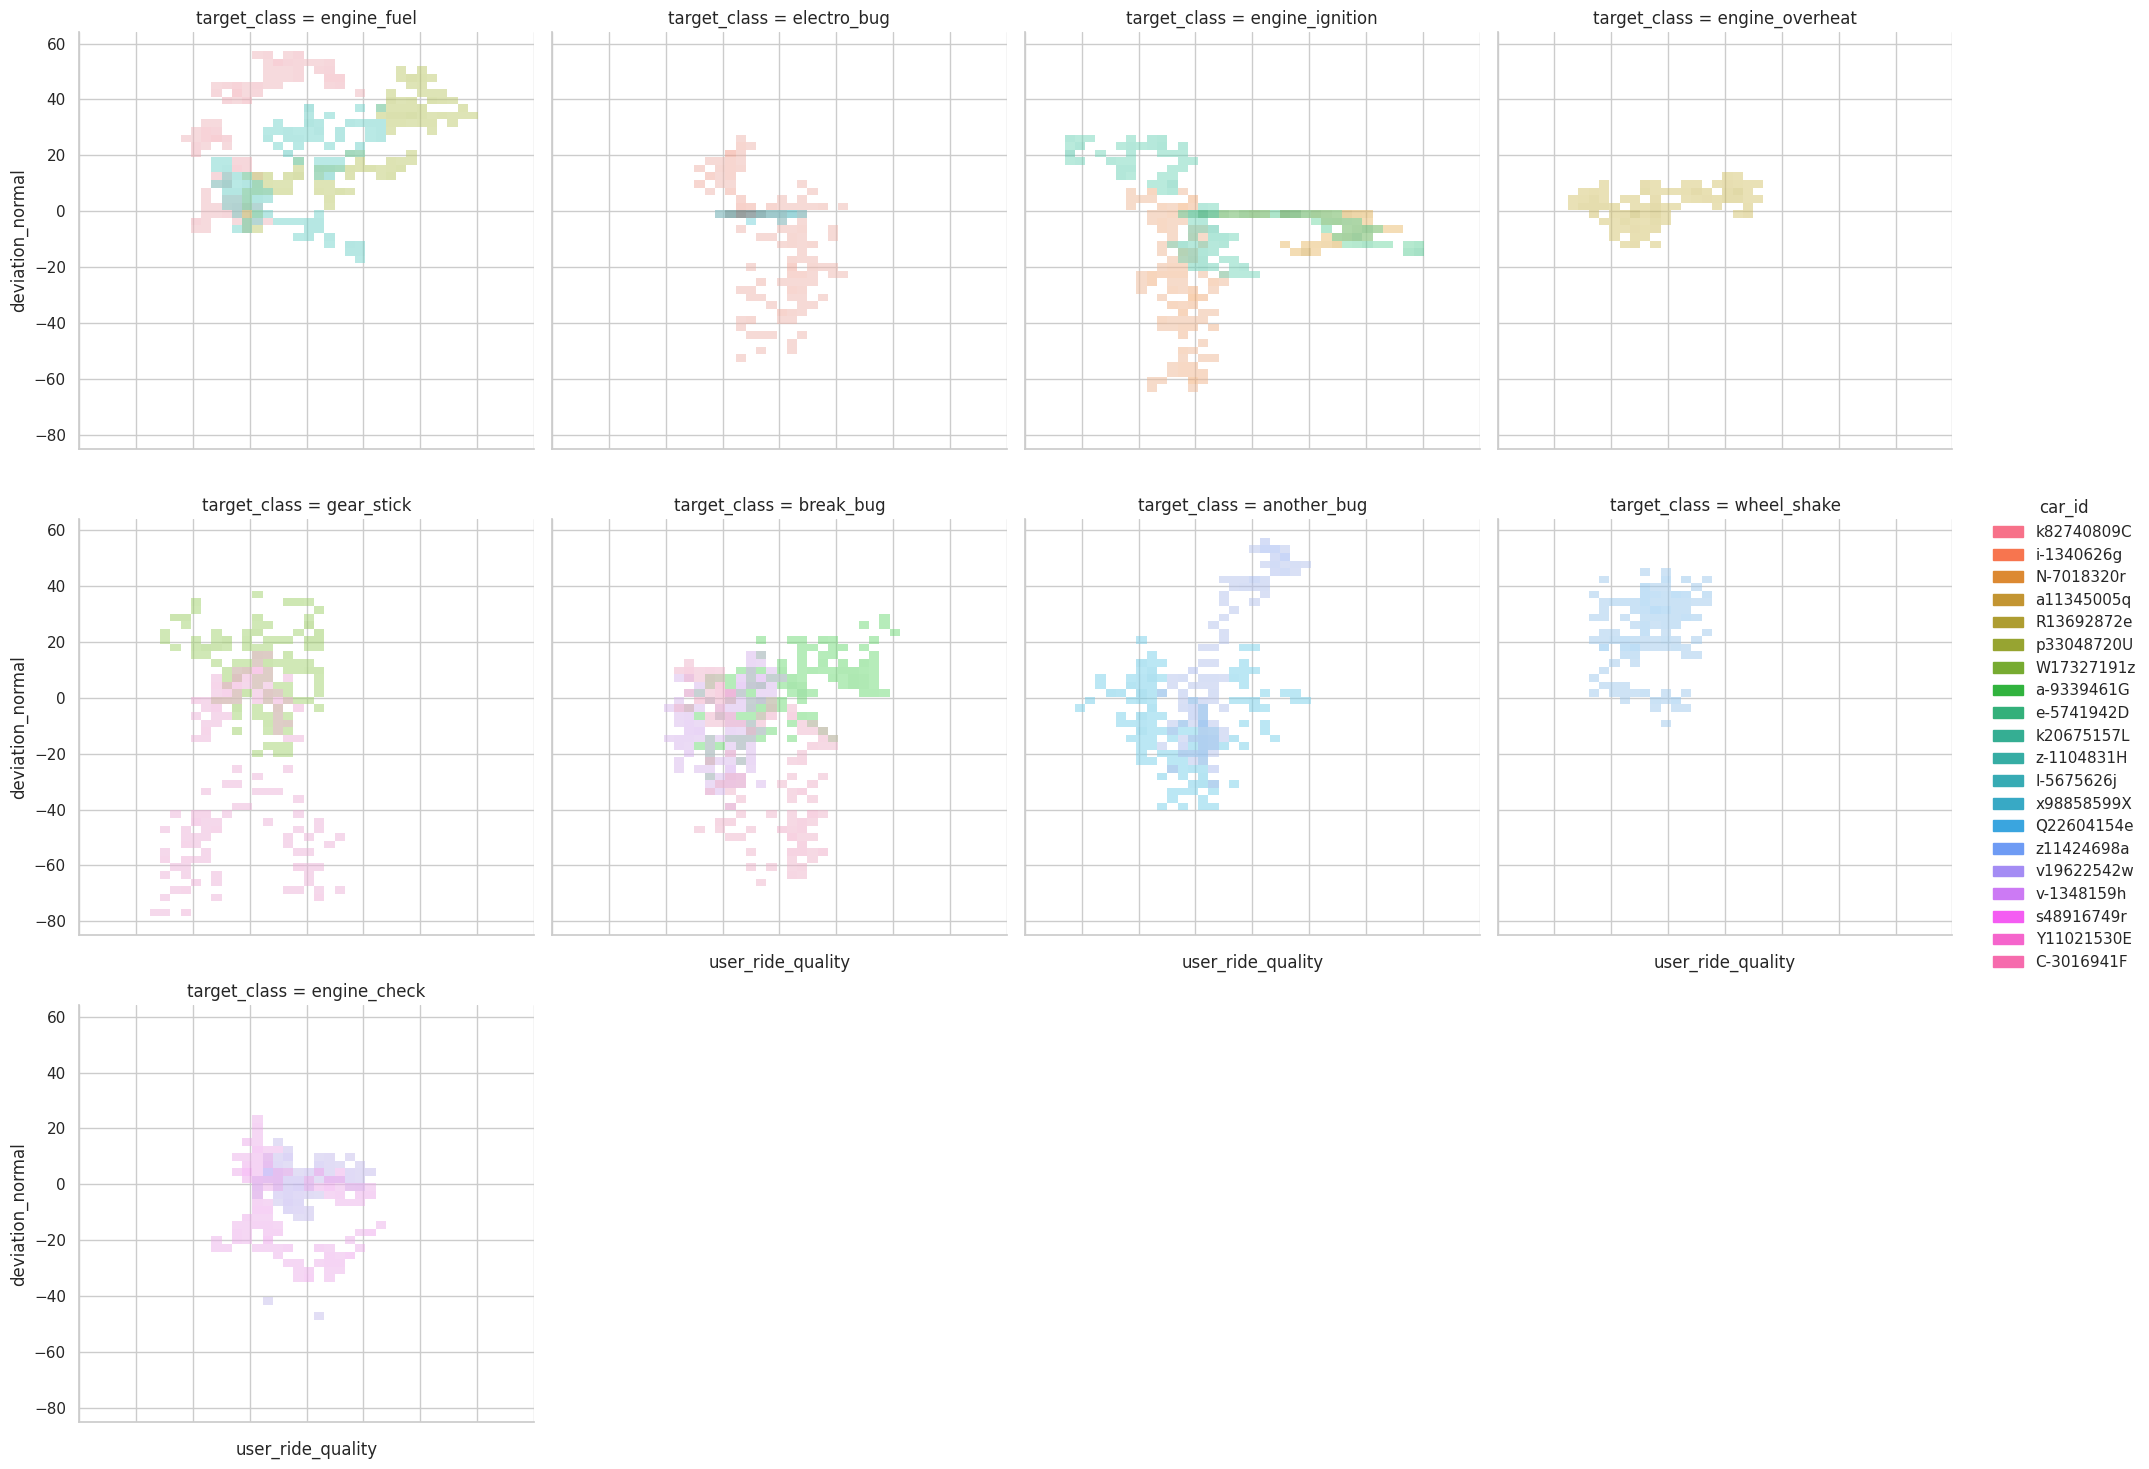

In [65]:
g = sns.displot(
    data=tmp,
    
    x="user_ride_quality",
    y="deviation_normal",
    
    aspect=1,
    # kind="kde",
    alpha=0.5,
    
    hue="car_id",
    col="target_class",
    
    col_wrap=4,
    
).set_xticklabels(rotation=45, horizontalalignment="right");

<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

# <center> 🔥 Категориальные данные и <b> `sns.catplot()`</b></center>

<div class="alert alert-info">
    
В Seaborn функция `catplot()` объединяет в себе функционал `boxplot()`, `violinplot()`, `boxenplot`, `stripplot`, `swarmplot`, а еще `pointplot`, `barplot` и `countplot`. Переключение происходит параметром `kind`. <br>
Получается, что снова можно держать в голове меньше разных названий функций и параметров.

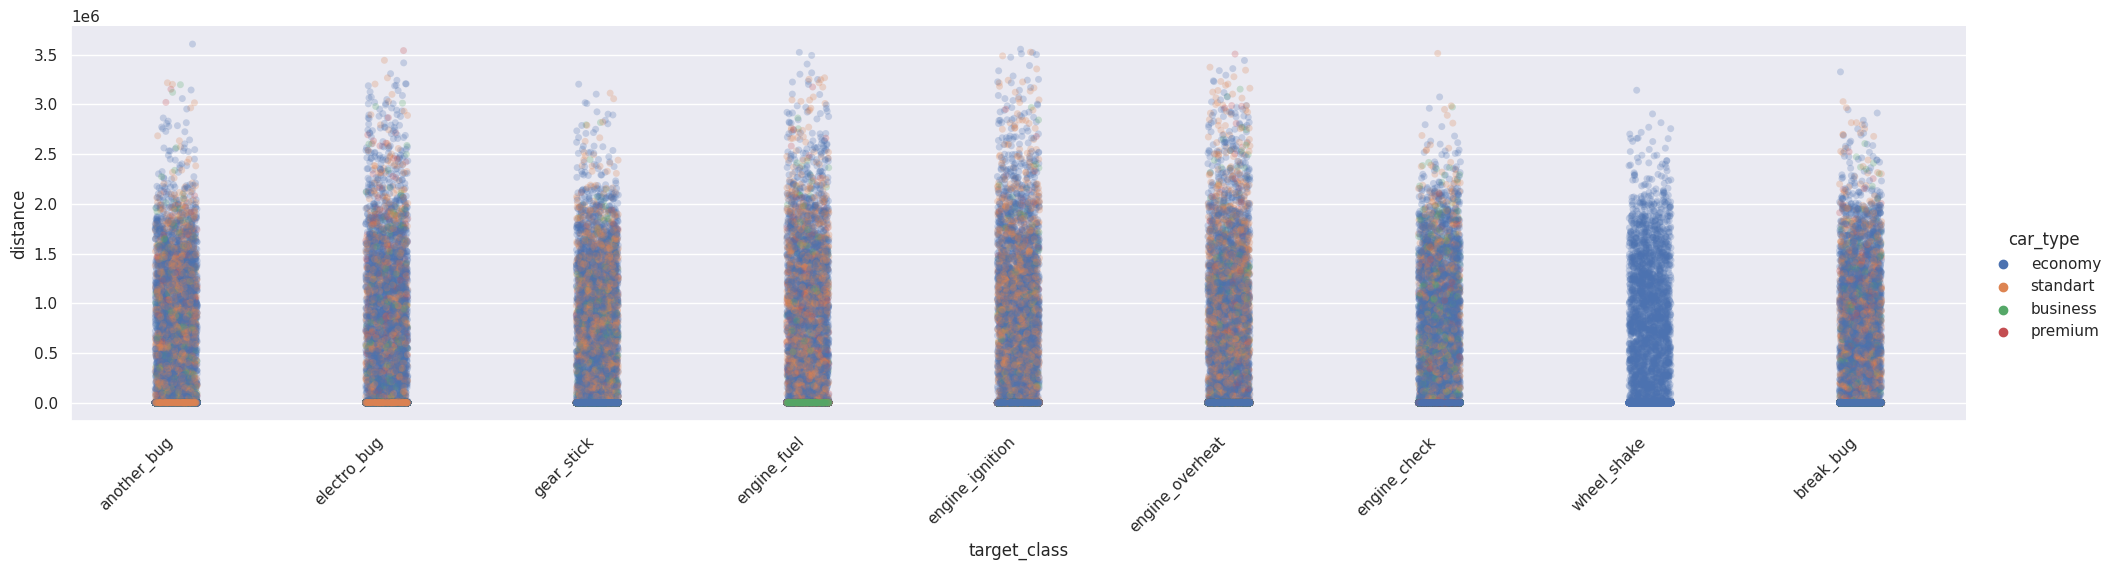

In [35]:
sns.catplot(
    data=rides_info,
    x="target_class",
    y="distance",
    
    aspect=4,
    hue="car_type",
    alpha=0.25,
    
).set_xticklabels(rotation=45, horizontalalignment="right");

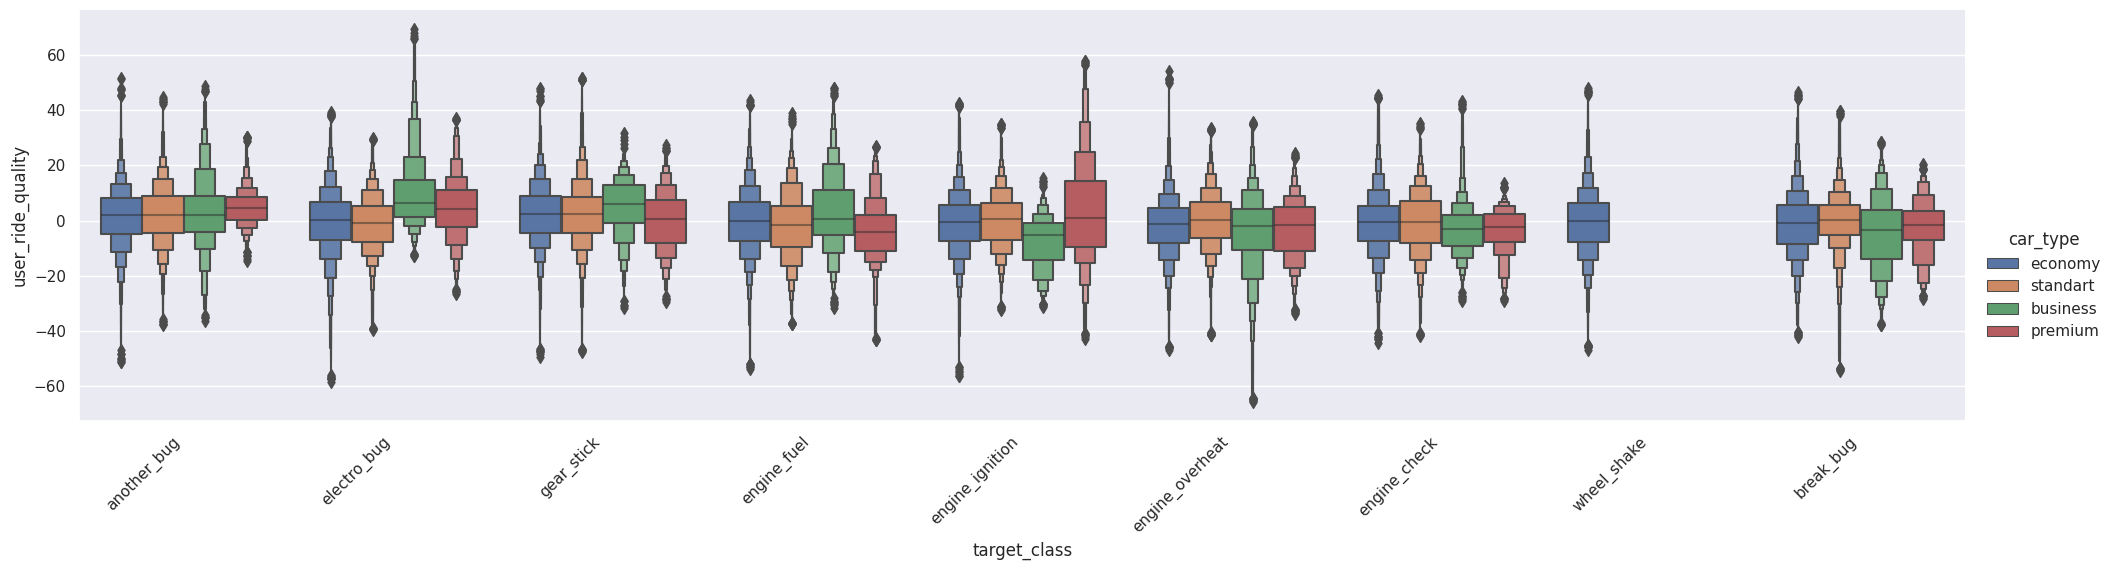

In [36]:
# Варируем в параметр kind, получаем любой вид графики

sns.catplot(
    data=rides_info,
    x="target_class",
    y="user_ride_quality",
    hue="car_type",
    aspect=4,
    kind="boxen",
).set_xticklabels(rotation=45, horizontalalignment="right");

<div class="alert alert-info">

__Вывод:__ Сходу замечаем, что поломки класса `wheel_shake` не происходят в трех сегментах машин.     
    
🧠 🧠 🧠  Многофункциональный метод `sns.catplot()` это третья вещь, после `sns.displot()` и `sns.relplot()` которую вам нужно запомнить и использовать при возможности!

<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

<!-- ничего -->

# <center>🔥 Попарные корреляции и тепловая карта - <b> `sns.heatmap()`</b> </center>

<div class="alert alert-info">
    
Функция `sns.heatmap()`  чаще всего используется для отрисовки наглядной матрицы корреляций признаков. Хотя можно её использовать, когда хочется подсветить какую угодно таблицу значений. 
    
Посмотрим как её построить на нашем датасете. Сначала посмотрим матрицу корреляций, котрорую выводит pandas:

In [66]:
rides_info.corr()

rating  ride_duration  ride_cost  speed_avg  speed_max  \
rating              1.000000       0.001227   0.001568  -0.086294  -0.234631   
ride_duration       0.001227       1.000000   0.915057  -0.001735   0.000430   
ride_cost           0.001568       0.915057   1.000000  -0.001216  -0.000034   
speed_avg          -0.086294      -0.001735  -0.001216   1.000000   0.496602   
speed_max          -0.234631       0.000430  -0.000034   0.496602   1.000000   
stop_times         -0.055198       0.009862   0.007818  -0.129687   0.051144   
distance           -0.003871       0.964560   0.882981   0.064636   0.032024   
refueling           0.001678       0.004879   0.004250   0.000575  -0.000847   
user_ride_quality  -0.000310       0.000633   0.001506  -0.007180  -0.008618   
deviation_normal   -0.042613      -0.000385   0.000323   0.040983   0.087402   
car_rating          0.003083       0.000894  -0.000041  -0.004753   0.000648   
year_to_start       0.000846       0.000103   0.002257  -0.001666  -0.012698   
riders              0.000837       0.000352   0.002378  -0.002308  -0.014007   
year_to_work        0.000607      -0.000472   0.004566   0.000170  -0.003338   
target_reg         -0.009872      -0.007002   0.022434   0.011917   0.057604   
age                 0.002053      -0.002866   0.000046   0.001540  -0.001196   
user_rating         0.003308      -0.000477   0.005591  -0.002659   0.006604   
user_rides         -0.002442      -0.000353   0.001068  -0.000611  -0.001281   
user_time_accident -0.001541      -0.000551   0.000340  -0.022310   0.003235   
sex                -0.004693       0.001111  -0.000168  -0.000349   0.002147   

                    stop_times  distance  refueling  user_ride_quality  \
rating               -0.055198 -0.003871   0.001678          -0.000310   
ride_duration         0.009862  0.964560   0.004879           0.000633   
ride_cost             0.007818  0.882981   0.004250           0.001506   
speed_avg            -0.129687  0.064636   0.000575          -0.007180   
speed_max             0.051144  0.032024  -0.000847          -0.008618   
stop_times            1.000000 -0.006981  -0.000387           0.020246   
distance             -0.006981  1.000000   0.003681           0.000124   
refueling            -0.000387  0.003681   1.000000           0.001204   
user_ride_quality     0.020246  0.000124   0.001204           1.000000   
deviation_normal      0.004780  0.002246  -0.001345          -0.011180   
car_rating            0.018989  0.000241  -0.002619           0.018024   
year_to_start         0.008198  0.000411   0.002083          -0.019891   
riders                0.009124  0.000757   0.001635          -0.020917   
year_to_work          0.002615  0.000053  -0.003023           0.021576   
target_reg            0.001753 -0.006557  -0.000594          -0.003869   
age                  -0.003088 -0.002923   0.001442          -0.003643   
user_rating           0.032055 -0.000643  -0.000931          -0.002574   
user_rides           -0.001420 -0.000154  -0.001680           0.001516   
user_time_accident    0.097187 -0.002103  -0.001195           0.003620   
sex                   0.005554  0.001479  -0.002582           0.003929   

                    deviation_normal  car_rating  year_to_start    riders  \
rating                     -0.042613    0.003083       0.000846  0.000837   
ride_duration              -0.000385    0.000894       0.000103  0.000352   
ride_cost                   0.000323   -0.000041       0.002257  0.002378   
speed_avg                   0.040983   -0.004753      -0.001666 -0.002308   
speed_max                   0.087402    0.000648      -0.012698 -0.014007   
stop_times                  0.004780    0.018989       0.008198  0.009124   
distance                    0.002246    0.000241       0.000411  0.000757   
refueling                  -0.001345   -0.002619       0.002083  0.001635   
user_ride_quality          -0.011180    0.018024      -0.019891 -0.020917   
deviation_normal

<div class="alert alert-info">
    
Можно ориентироваться, но достаточно сложно при большом количестве признаков. <br>
Теперь отрисуем матрицу с помощью `sns.heatmap( )`:

In [38]:
# Размер будущей тепловой карты. Можно указать в коде разово
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 12)

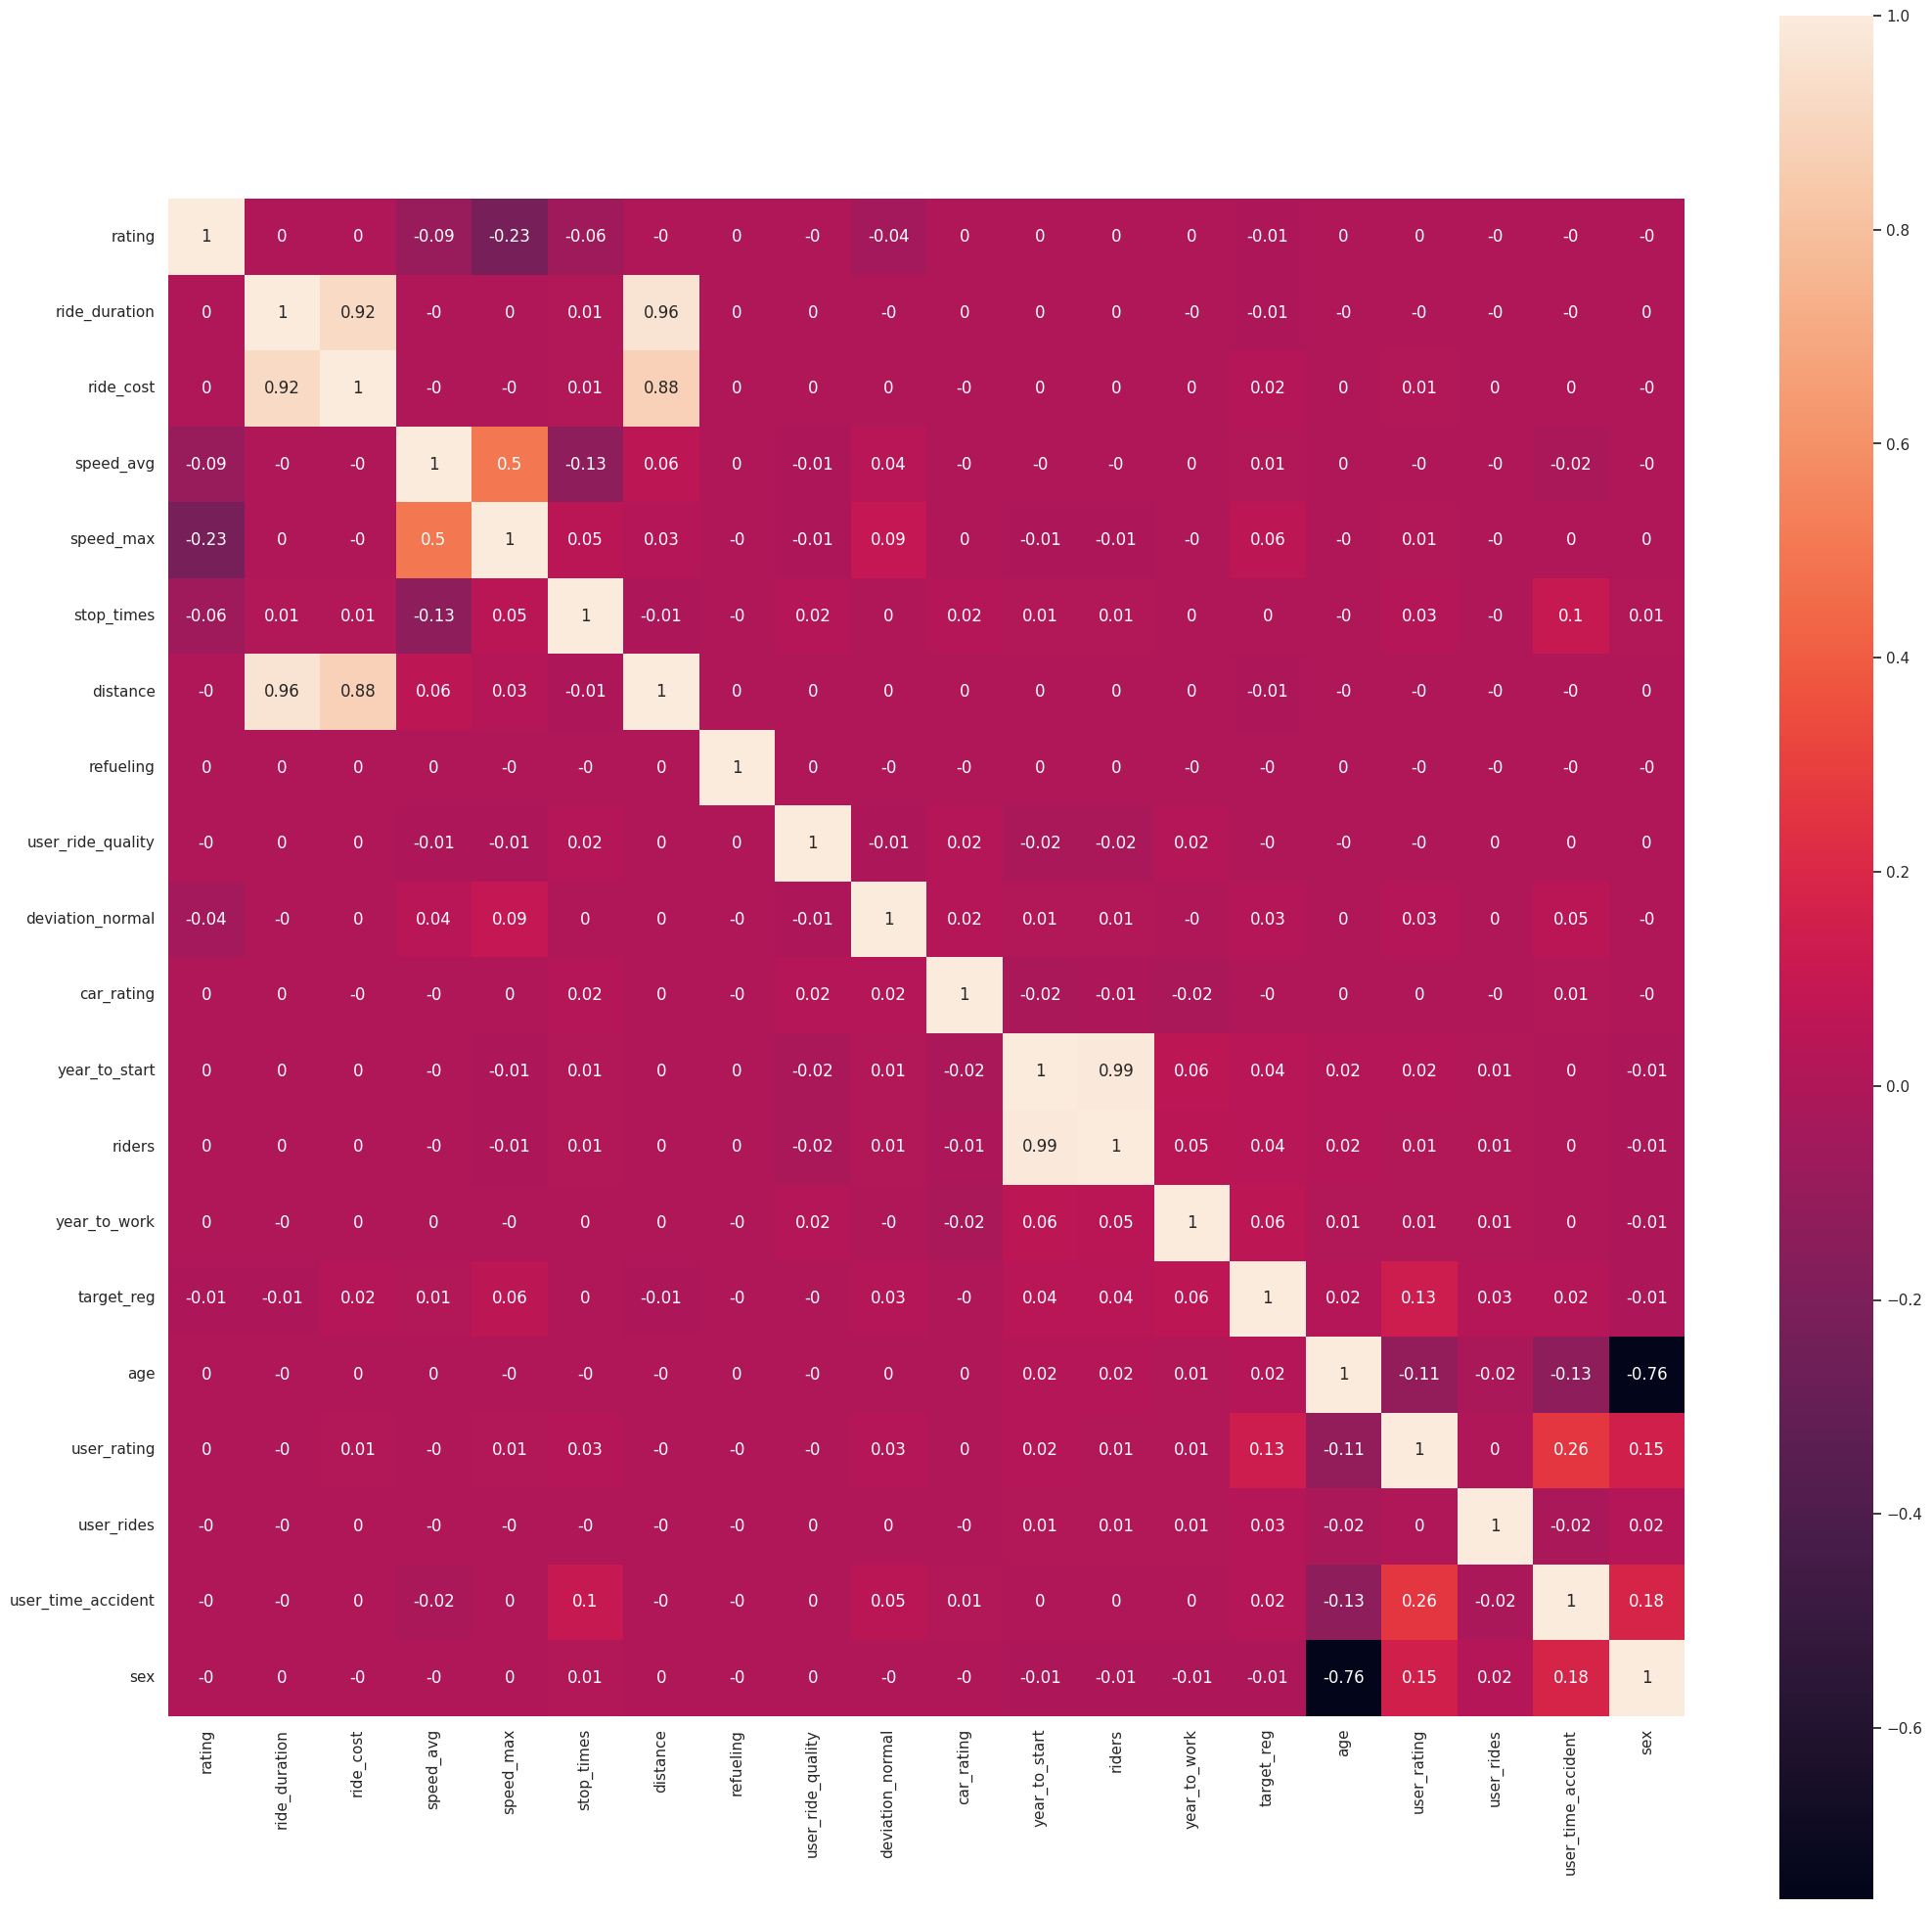

In [67]:
sns.heatmap(
    data=rides_info.corr().round(2),
    square=True,
    annot=True,
);

## Добавим красоты

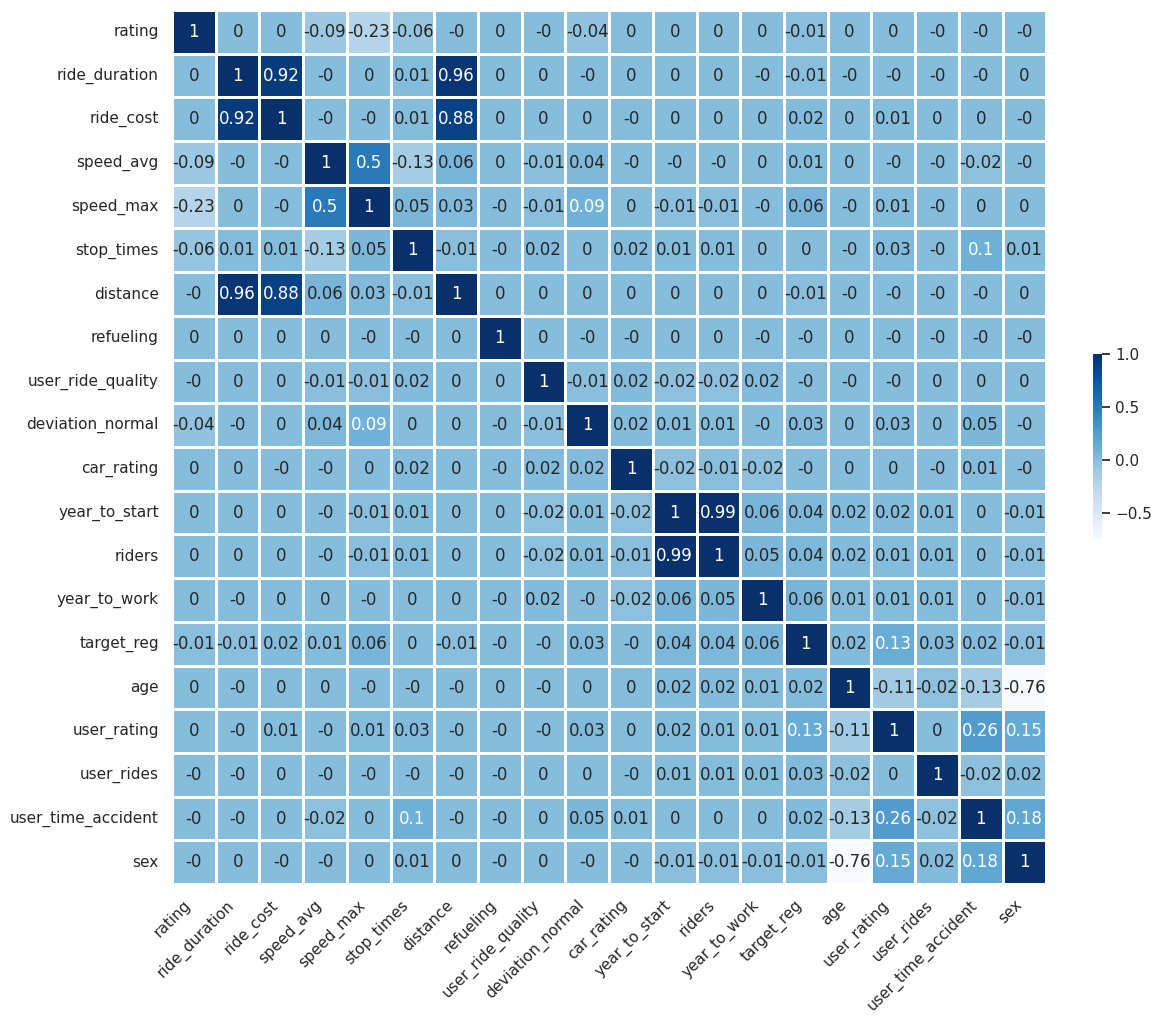

In [40]:
heatmap = sns.heatmap(
    rides_info.corr().round(2),
    annot=True,
    square=True,
    
    cmap="Blues",  # использовать синию цветовую карту
    cbar_kws={"fraction": 0.01},  # боковой колор-бар (shrink colour bar)
    linewidth=2,  # пространство между клетками
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
);

<div class="alert alert-info">
    
Видно, что части снизу и сверху от диагонали идентичны, и новой инфомации не несут, создавая визуальный шум - уберем одну из них

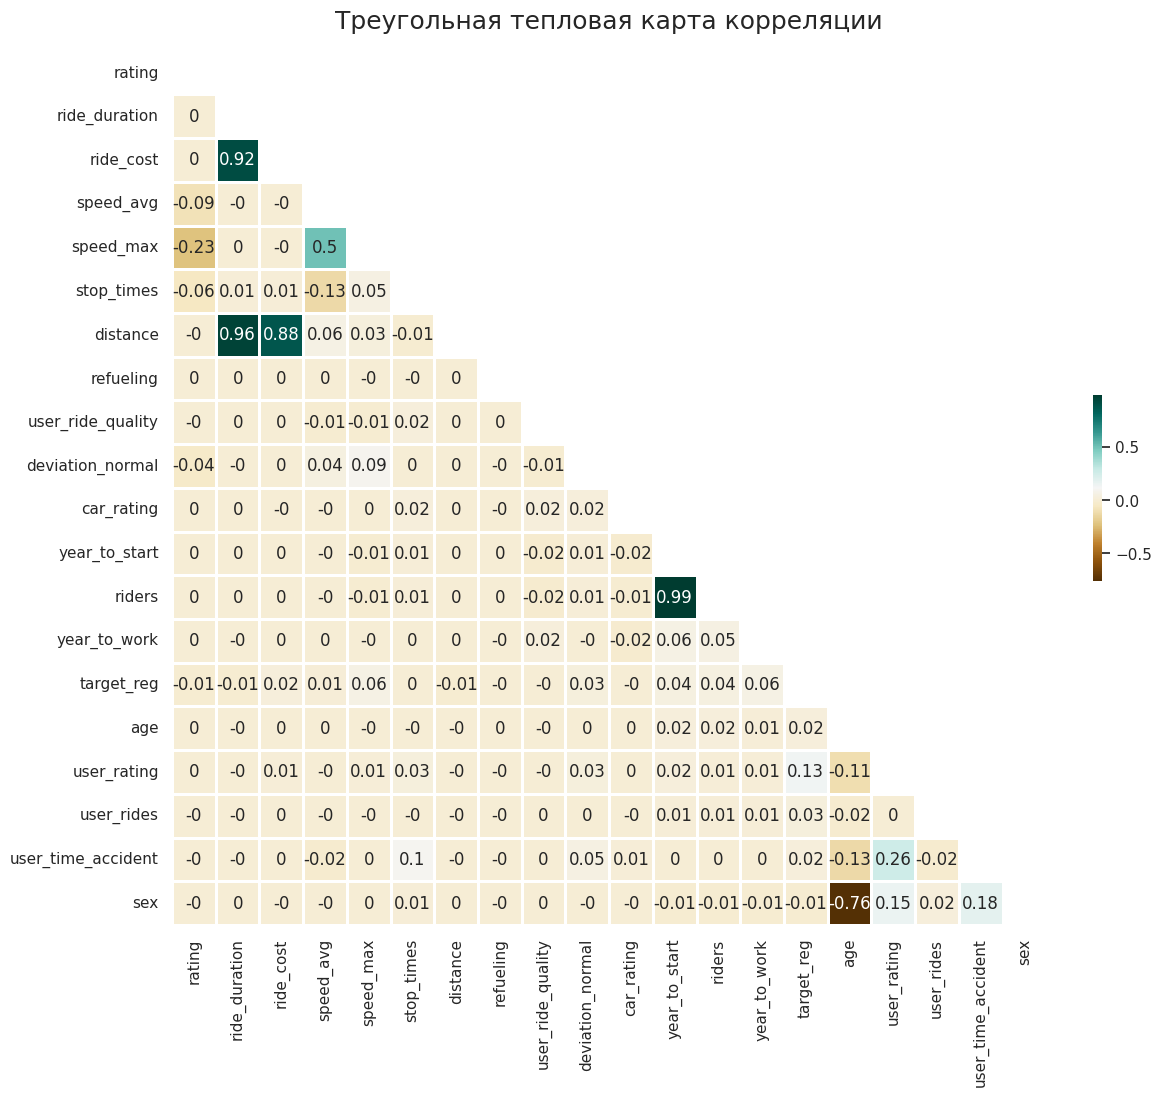

In [41]:
sns.set_style("whitegrid")

# Воспользуемся функциями np.triu, чтобы изолировать верхний треугольник (np.tril нижний)
# функция np.ones_like() изменит все изолированные значения на 1.
mask = np.triu(np.ones_like(rides_info.corr(), dtype=bool))

heatmap = sns.heatmap(
    rides_info.corr().round(2),
    annot=True,
    square=True,
    cmap="BrBG",
    cbar_kws={"fraction": 0.01},
    linewidth=1,
    
    mask=mask,
)

heatmap.set_title(
    "Треугольная тепловая карта корреляции", fontdict={"fontsize": 18}, pad=16
);

<!-- ничего -->

<!-- ничего -->

# <center>Связка  `pd.crosstab` + `sns.heatmap` = 🔥 </center> 

In [42]:
# Размер будущей тепловой карты. Можно указать в коде разово
plt.rcParams["figure.figsize"] = (25, 25)

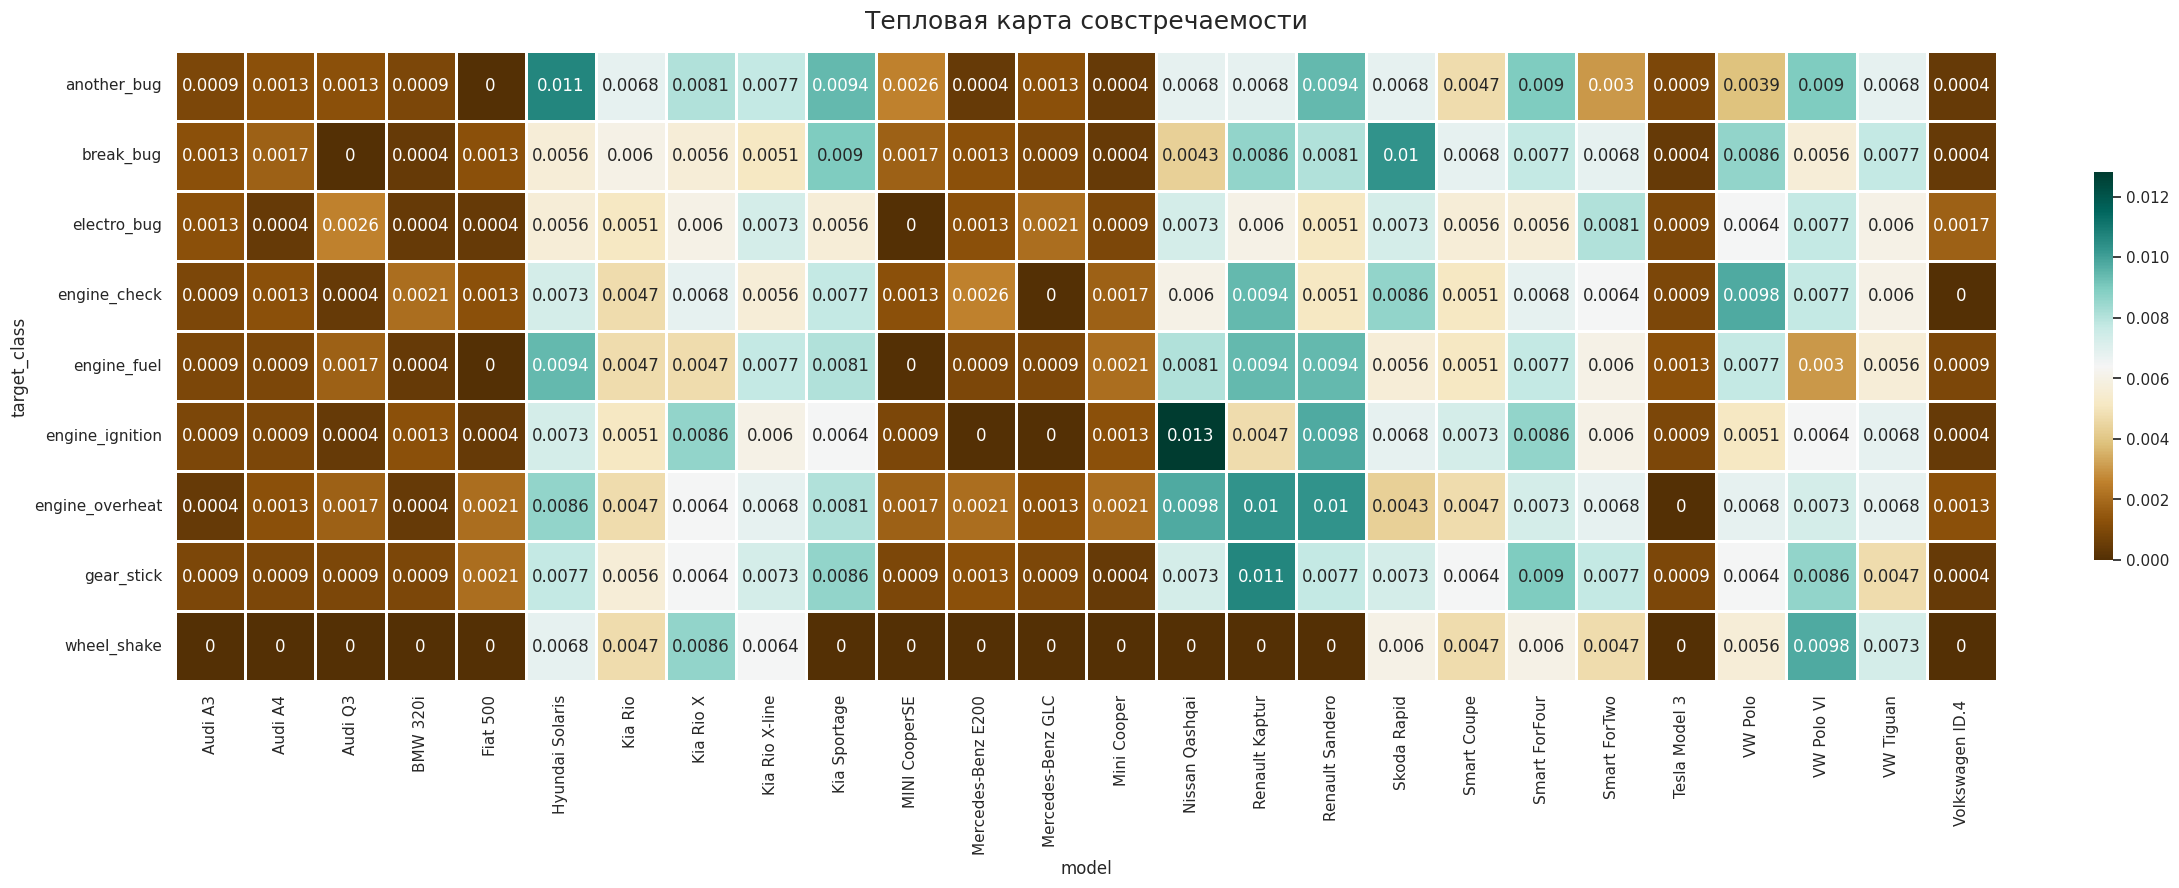

In [43]:
crst = pd.crosstab(
    rides_info["target_class"],
    rides_info["model"],
    normalize=True,
).round(4)


heatmap = sns.heatmap(
    crst,
    annot=True,
    square=True,
    cmap="BrBG",
    cbar_kws={"fraction": 0.01},
    linewidth=1,
)

heatmap.set_title("Тепловая карта совстречаемости", fontdict={"fontsize": 18}, pad=16);

# <center> 🔥 Парные зависимости между переменными и <b> `sns.pairplot()` </b></center>

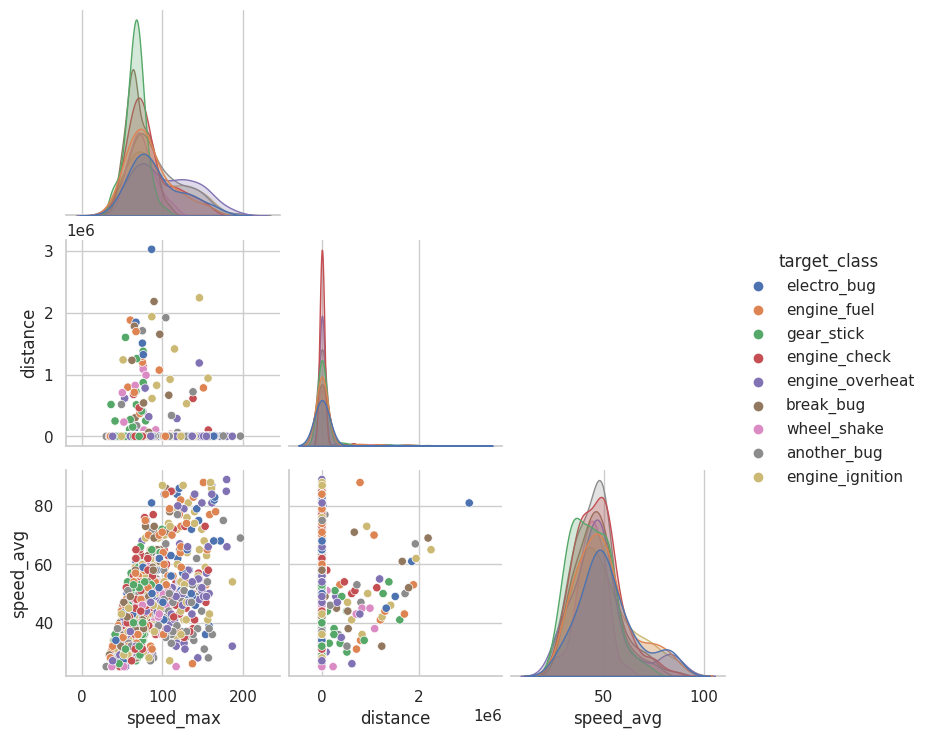

In [48]:
sns.pairplot(
    rides_info.sample(1000),
    vars=["speed_max", "distance", "speed_avg"],
    corner=True,
    hue="target_class",
);

# <center> `sns.lmplot` = `sns.pairplot` + умение провести прямую </center> 

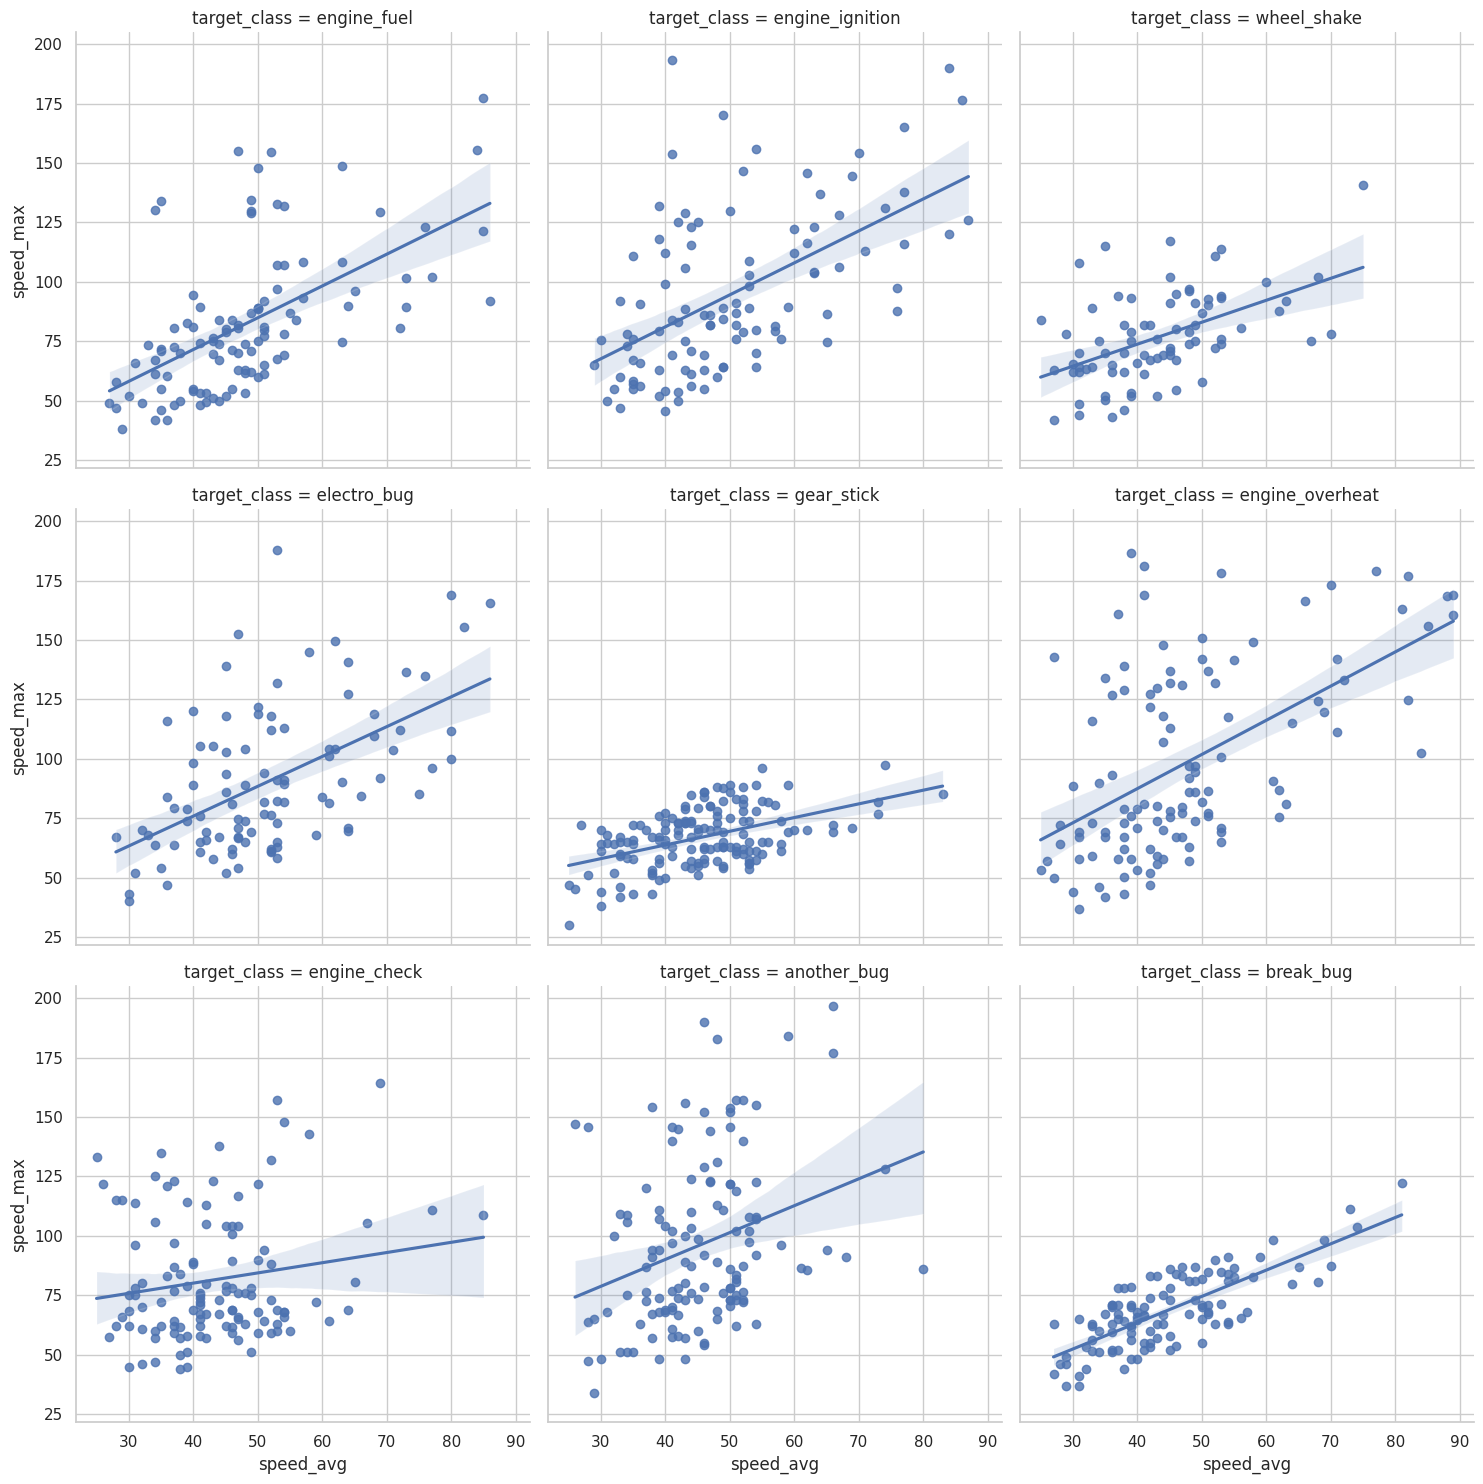

In [49]:
sns.lmplot(
    data=rides_info.sample(1000),
    x="speed_avg",
    y="speed_max",
    
    col="target_class",
    
    col_wrap=3,
);

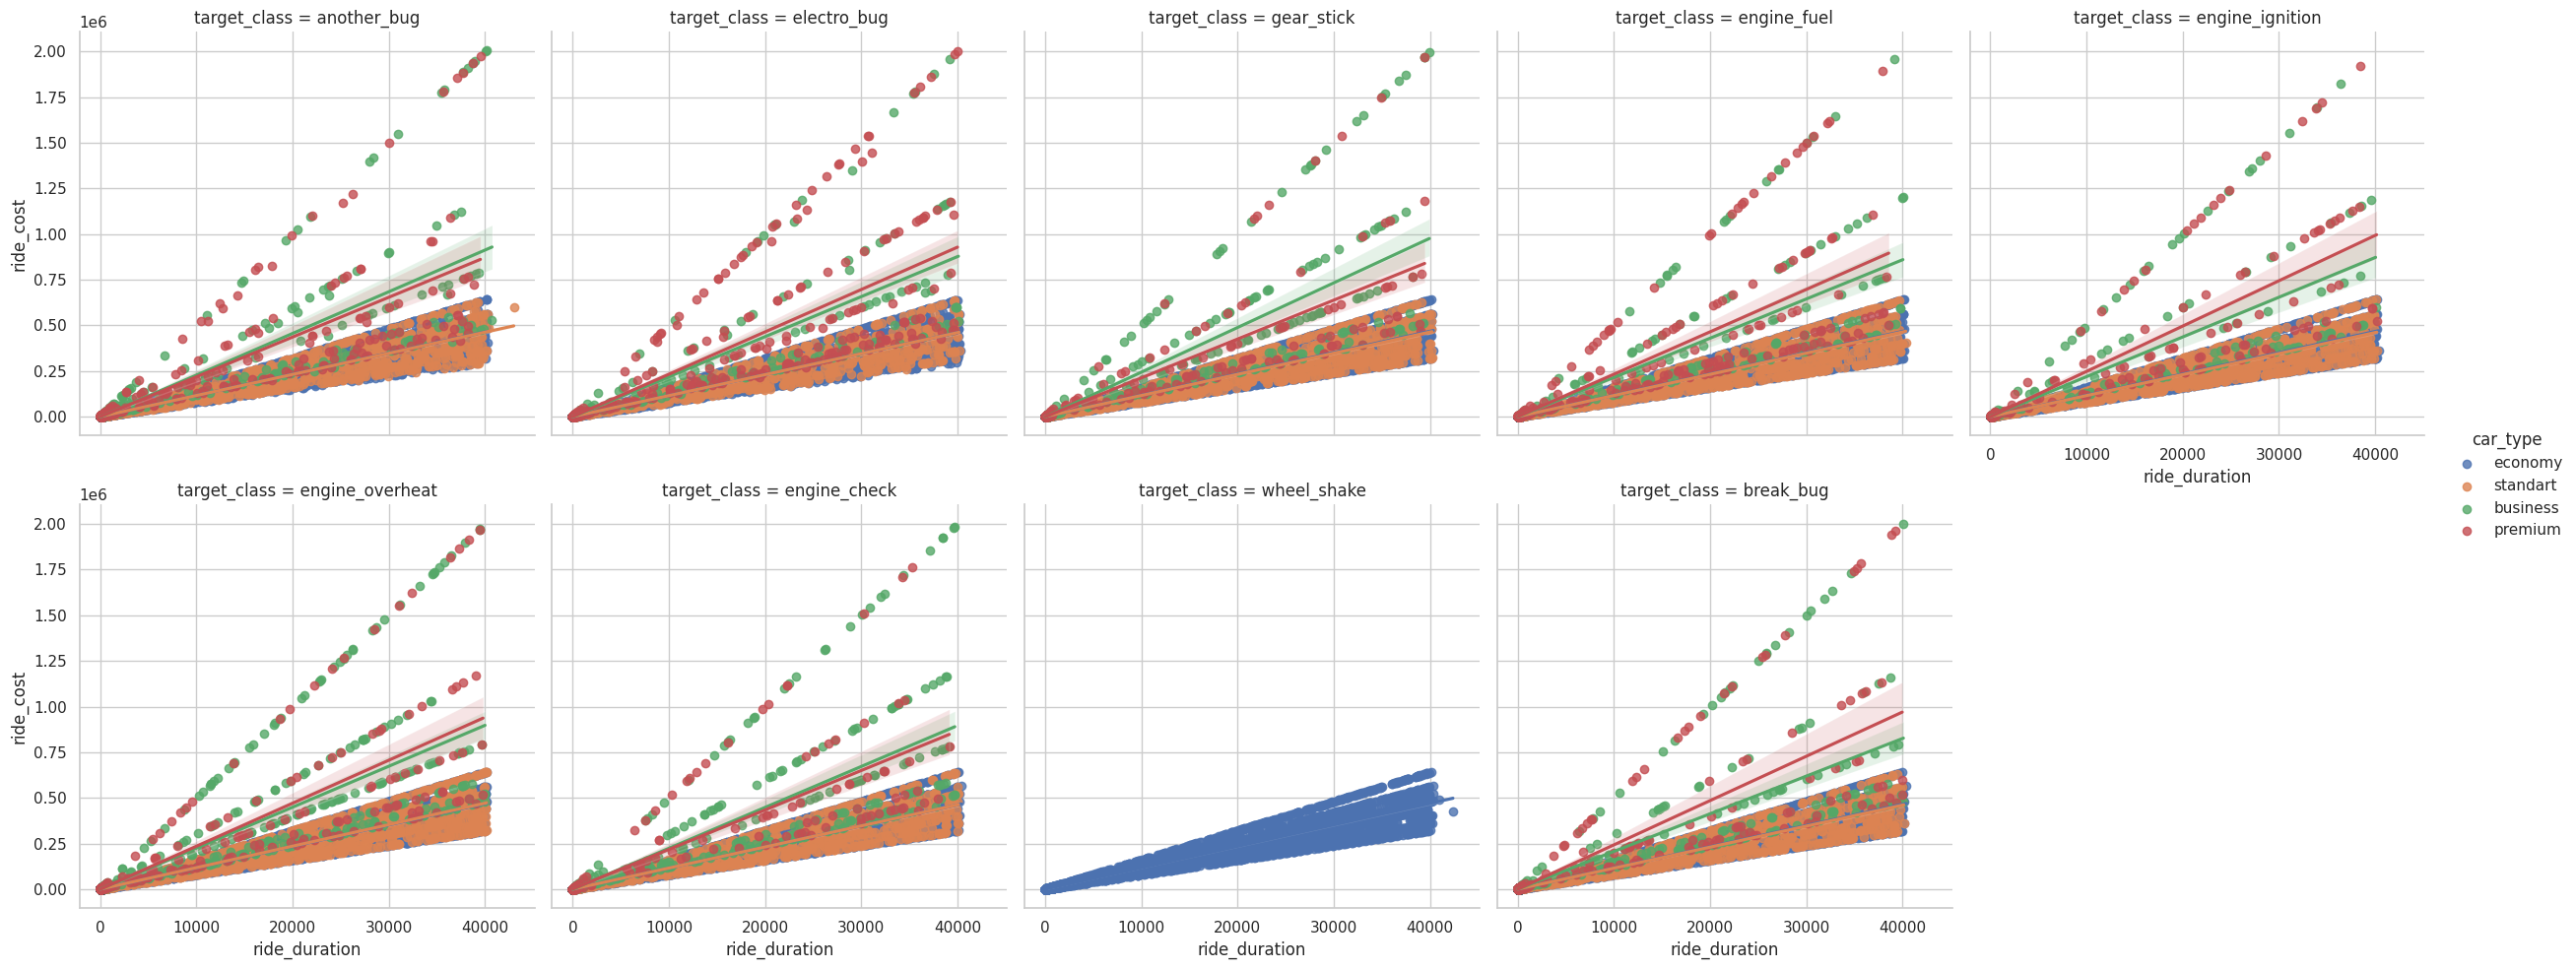

In [50]:
sns.lmplot(
    data=rides_info,
    x="ride_duration",
    y="ride_cost",
    col="target_class",
    
    hue="car_type",
    
    col_wrap=5,
);

# <center>Композиция нескольких видов графиков и <b> `sns.jointplot()`</b></center> 

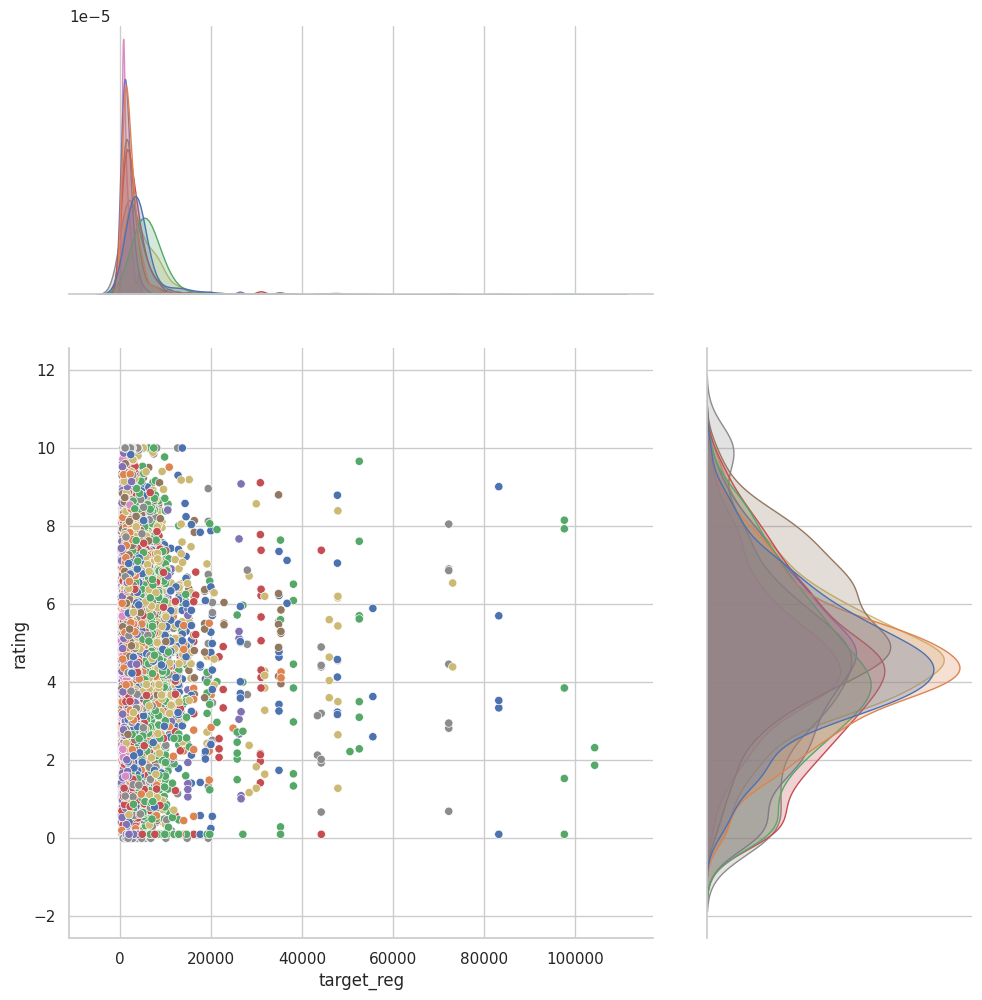

In [51]:
# Диаграмма рассеяния + распределения

sns.jointplot(
    data=rides_info.sample(10_000),
    x="target_reg",
    y="rating",
    hue="target_class",
    height=10,
    legend=False,
    ratio=2,
    kind="scatter",
);

### Карта графики Seaborn
<center> <img src = 'https://martinnormark.com/content/images/size/w2400/2020/10/2VmgDnF.png' width=1000>

# Итоги и выводы:

- Способов визуализации много. Иногда можно даже не выходить из Pandas
- Seaborn очень функциональный и понятный фреймворк. Для соревновательноо DS этого достаточно.
- Запомните хотя бы три самых важных для себя функции и пользуйтесь

__например__: `sns.relplot` / `sns.displot` / `sns.heatmap`

- Растягивайте признак по времени, по частоте или другому признаку.
- Раскрашивайте в таргет!

# <center> Спасибо за внимание! </center>